# Welcome to our notebook!
This notebook is a clone of the most important code cells for our project. Feel free to scroll around to see our cleaning methods, strategy approach and results. It might be helpful to minimize some sections (e.g. Data Extraction + Feature Engineering) during the presentation.
Cheers! *Group 1: Vian Djianto, Yueping Luo, Roy Wang, Roy Wu, Yihan Xie*


# 0. Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip3 install yfinance

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from collections import defaultdict
# import yfinance as yf
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

# 1. Data Extraction + Feature Engineering

## 1.1 Data Loading

In [ ]:
# load pickle
bill_df = pd.read_pickle('/content/drive/MyDrive/737 capstone/bill.pickle')
bill_df

,Bill
Date,
2014-01-02,0.000002
2014-01-03,0.000002
2014-01-06,0.000002
2014-01-07,0.000002
2014-01-08,0.000002
...,...
2021-12-23,0.000002
2021-12-27,0.000002
2021-12-28,0.000002


In [ ]:
# load pickle
wrds_df = pd.read_pickle('/content/drive/MyDrive/737 capstone/wrds_df')
wrds_df

,PERMNO,date,TICKER,COMNAM,CUSIP,PRC,RETX,ewretx,sprtrn,SHROUT
0,10001,2014-01-02,EGAS,GAS NATURAL INC,36720410,8.04000,0.001245,-0.004084,-0.008862,10452.0
1,10001,2014-01-03,EGAS,GAS NATURAL INC,36720410,8.18000,0.017413,0.004081,-0.000333,10452.0
2,10001,2014-01-06,EGAS,GAS NATURAL INC,36720410,8.34000,0.019560,-0.001696,-0.002512,10452.0
3,10001,2014-01-07,EGAS,GAS NATURAL INC,36720410,8.77000,0.051559,0.006875,0.006082,10452.0
4,10001,2014-01-08,EGAS,GAS NATURAL INC,36720410,8.96000,0.021665,0.000801,-0.000212,10452.0
...,...,...,...,...,...,...,...,...,...,...
15145616,93436,2021-12-27,TSLA,TESLA INC,88160R10,1093.93994,0.025248,0.002122,0.013839,1004265.0
15145617,93436,2021-12-28,TSLA,TESLA INC,88160R10,1088.46997,-0.005,-0.007395,-0.001010,1004265.0
15145618,93436,2021-12-29,TSLA,TESLA INC,88160R10,1086.18994,-0.002095,-0.003815,0.001402,1004265.0
15145619,93436,2021-12-30,TSLA,TESLA INC,88160R10,1070.33997,-0.014592,0.006484,-0.002990,1004265.0


In [ ]:
# load pickle
estimize_df = pd.read_pickle('/content/drive/MyDrive/737 capstone/estimize_df')
estimize_df

,date,ticker,cusip,instrument_id,instrument_name,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day
0,2013-01-31,MLM,573284106,1,Martin Marietta Materials Inc.,Materials,2012,4,2013-02-12,0.452788,4.0,NaN,0.460000,2013-02-06,2013-02-07,2013-02-08,2013-02-11,2013-02-13
1,2013-02-01,MLM,573284106,1,Martin Marietta Materials Inc.,Materials,2012,4,2013-02-12,0.452733,4.0,NaN,0.460000,2013-02-06,2013-02-07,2013-02-08,2013-02-11,2013-02-13
2,2013-02-02,MLM,573284106,1,Martin Marietta Materials Inc.,Materials,2012,4,2013-02-12,0.452733,4.0,NaN,0.460000,2013-02-06,2013-02-07,2013-02-08,2013-02-11,2013-02-13
3,2013-02-03,MLM,573284106,1,Martin Marietta Materials Inc.,Materials,2012,4,2013-02-12,0.469858,5.0,NaN,0.460000,2013-02-06,2013-02-07,2013-02-08,2013-02-11,2013-02-13
4,2013-02-04,MLM,573284106,1,Martin Marietta Materials Inc.,Materials,2012,4,2013-02-12,0.474410,7.0,NaN,0.460000,2013-02-06,2013-02-07,2013-02-08,2013-02-11,2013-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657527,2021-08-08,MESA,590479135,3298,"Mesa Air Group, Inc.",Industrials,2021,3,2021-08-09,0.124922,4.0,0.10000,0.110000,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-10
6657528,2021-08-09,MESA,590479135,3298,"Mesa Air Group, Inc.",Industrials,2021,3,2021-08-09,0.147068,4.0,0.10000,0.110000,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-10
6657529,2021-08-02,ADT,00090Q103,3301,ADT Inc.,Industrials,2021,2,2021-08-04,0.235038,3.0,0.24533,0.178981,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-05
6657530,2021-08-03,ADT,00090Q103,3301,ADT Inc.,Industrials,2021,2,2021-08-04,0.235038,3.0,0.24533,0.178981,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-05


## 1.2 Feature Engineering

### 1.2.1 Filter estimize_df

In [ ]:
# fetch only dates that are 4 days before announcement reporting date
estimize_df = estimize_df[estimize_df['date']==estimize_df['prev_4_day']]
estimize_df = estimize_df.reset_index(drop=True)

# make sure dates are converted to pd datetime
estimize_df['date'] = pd.to_datetime(estimize_df['date']).dt.date
estimize_df['reports_at'] = pd.to_datetime(estimize_df['reports_at']).dt.date
estimize_df['prev_4_day'] = pd.to_datetime(estimize_df['prev_4_day']).dt.date
estimize_df['prev_3_day'] = pd.to_datetime(estimize_df['prev_3_day']).dt.date
estimize_df['prev_2_day'] = pd.to_datetime(estimize_df['prev_2_day']).dt.date
estimize_df['prev_1_day'] = pd.to_datetime(estimize_df['prev_1_day']).dt.date
estimize_df['post_1_day'] = pd.to_datetime(estimize_df['post_1_day']).dt.date

# clean up cusip column so it can be matched with wrds_df later
estimize_df['cusip'] = estimize_df['cusip'].apply(lambda x : str(x)[:8])

estimize_df

,date,ticker,cusip,instrument_id,instrument_name,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day
0,2013-02-06,MLM,57328410,1,Martin Marietta Materials Inc.,Materials,2012,4,2013-02-12,0.474334,7.0,NaN,0.460000,2013-02-06,2013-02-07,2013-02-08,2013-02-11,2013-02-13
1,2014-04-23,MLM,57328410,1,Martin Marietta Materials Inc.,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311000,-0.350000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30
2,2014-07-23,MLM,57328410,1,Martin Marietta Materials Inc.,Materials,2014,2,2014-07-29,1.260868,3.0,1.227000,1.340000,2014-07-23,2014-07-24,2014-07-25,2014-07-28,2014-07-30
3,2014-10-22,MLM,57328410,1,Martin Marietta Materials Inc.,Materials,2014,3,2014-10-28,1.719912,4.0,1.687000,1.450000,2014-10-22,2014-10-23,2014-10-24,2014-10-27,2014-10-29
4,2015-02-04,MLM,57328410,1,Martin Marietta Materials Inc.,Materials,2014,4,2015-02-10,0.850553,4.0,0.853000,0.990000,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39924,2021-07-29,AERI,00771V10,3280,"Aerie Pharmaceuticals, Inc.",Health Care,2021,2,2021-08-04,-0.657930,4.0,-0.680102,-0.670000,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-05
39925,2021-08-03,FLGT,35966410,3284,"Fulgent Genetics, Inc.",Health Care,2021,2,2021-08-09,2.028226,5.0,2.756667,2.550000,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-10
39926,2021-08-03,APPS,25400W10,3285,"Digital Turbine, Inc.",Information Technology,2022,1,2021-08-09,0.327591,4.0,0.312500,0.340000,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-10
39927,2021-09-22,DAVA,29260V10,3286,Endava PLC - ADR,Information Technology,2021,4,2021-09-28,0.500000,3.0,0.492234,0.554935,2021-09-22,2021-09-23,2021-09-24,2021-09-27,2021-09-29


### 1.3.2 Merge estimize_df and wrds_df

In [ ]:
# merge estimize_df and wrds_df on date = prev_3_day
merged_df = pd.merge(estimize_df, wrds_df, how='inner', left_on=['cusip','prev_3_day'], right_on=['CUSIP','date'])
merged_df = merged_df.drop(columns=['date_y','cusip','ticker','instrument_id','instrument_name','PERMNO','COMNAM','PRC','ewretx'])
merged_df = merged_df.rename(columns={'date_x':'date','RETX':'RETX_prev_3','sprtrn':'sprtrn_prev_3'})

# merge merged_df and wrds_df on date = prev_2_day
merged_df = pd.merge(merged_df, wrds_df, how='inner', left_on=['CUSIP','prev_2_day'], right_on=['CUSIP','date'])
merged_df = merged_df.drop(columns=['date_y','TICKER_y','PERMNO','COMNAM','PRC','ewretx','SHROUT_y'])
merged_df = merged_df.rename(columns={'date_x':'date','SHROUT_x':'SHROUT','TICKER_x':'TICKER','RETX':'RETX_prev_2','sprtrn':'sprtrn_prev_2'})

# merge merged_df and wrds_df on date = prev_1_day
merged_df = pd.merge(merged_df, wrds_df, how='inner', left_on=['CUSIP','prev_1_day'], right_on=['CUSIP','date'])
merged_df = merged_df.drop(columns=['date_y','TICKER_y','PERMNO','COMNAM','PRC','ewretx','SHROUT_y'])
merged_df = merged_df.rename(columns={'date_x':'date','SHROUT_x':'SHROUT','TICKER_x':'TICKER','RETX':'RETX_prev_1','sprtrn':'sprtrn_prev_1'})

# merge merged_df and wrds_df on date = report date
merged_df = pd.merge(merged_df, wrds_df, how='inner', left_on=['CUSIP','reports_at'], right_on=['CUSIP','date'])
merged_df = merged_df.drop(columns=['date_y','TICKER_y','PERMNO','COMNAM','PRC','ewretx','SHROUT_y'])
merged_df = merged_df.rename(columns={'date_x':'date','SHROUT_x':'SHROUT','TICKER_x':'TICKER','RETX':'RETX_reports_at','sprtrn':'sprtrn_reports_at'})

# merge merged_df and wrds_df on date = post_1_day
merged_df = pd.merge(merged_df, wrds_df, how='inner', left_on=['CUSIP','post_1_day'], right_on=['CUSIP','date'])
merged_df = merged_df.drop(columns=['date_y','TICKER_y','PERMNO','COMNAM','PRC','ewretx','SHROUT_y'])
merged_df = merged_df.rename(columns={'date_x':'date','SHROUT_x':'SHROUT','TICKER_x':'TICKER','RETX':'RETX_post_1','sprtrn':'sprtrn_post_1'})

merged_df

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,RETX_prev_3,sprtrn_prev_3,SHROUT,RETX_prev_2,sprtrn_prev_2,RETX_prev_1,sprtrn_prev_1,RETX_reports_at,sprtrn_reports_at,RETX_post_1,sprtrn_post_1
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311000,-0.350000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,-0.001498,0.001717,46159.0,-0.023689,-0.008096,-0.054594,0.003236,0.063992,0.004761,-0.000322,0.002992
1,2014-07-23,Materials,2014,2,2014-07-29,1.260868,3.0,1.227000,1.340000,2014-07-23,2014-07-24,2014-07-25,2014-07-28,2014-07-30,MLM,57328410,0.002127,0.000488,66919.0,-0.007657,-0.004849,-0.015662,0.000288,0.002561,-0.004528,-0.004955,0.000061
2,2014-10-22,Materials,2014,3,2014-10-28,1.719912,4.0,1.687000,1.450000,2014-10-22,2014-10-23,2014-10-24,2014-10-27,2014-10-29,MLM,57328410,0.018273,0.012303,66919.0,0.011936,0.007053,-0.018791,-0.001502,-0.030841,0.011939,-0.015654,-0.001385
3,2015-02-04,Materials,2014,4,2015-02-10,0.850553,4.0,0.853000,0.990000,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-11,MLM,57328410,0.022787,0.010291,67270.0,0.003146,-0.003418,0.010087,-0.004247,0.151729,0.010676,0.020766,-0.000029
4,2015-07-29,Materials,2015,2,2015-08-04,1.642996,5.0,1.616000,1.290000,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-05,MLM,57328410,0.000572,0.000028,67481.0,-0.004128,-0.002272,-0.001913,-0.002757,0.056926,-0.002250,0.028471,0.003115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37353,2021-07-29,Health Care,2021,2,2021-08-04,-0.657930,4.0,-0.680102,-0.670000,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-05,AERI,00771V10,-0.005044,-0.005406,47234.0,0.005703,-0.001843,-0.039067,0.008203,-0.016393,-0.004632,0.000667,0.006005
37354,2021-08-03,Health Care,2021,2,2021-08-09,2.028226,5.0,2.756667,2.550000,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-10,FLGT,35966410,0.100040,-0.004632,29521.0,0.003258,0.006005,-0.046090,0.001675,0.037821,-0.000940,-0.113156,0.000993
37355,2021-08-03,Information Technology,2022,1,2021-08-09,0.327591,4.0,0.312500,0.340000,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-10,APPS,25400W10,-0.000631,-0.004632,96093.0,0.036961,0.006005,0.002894,0.001675,-0.020656,-0.000940,-0.068238,0.000993
37356,2021-09-22,Information Technology,2021,4,2021-09-28,0.500000,3.0,0.492234,0.554935,2021-09-22,2021-09-23,2021-09-24,2021-09-27,2021-09-29,DAVA,29260V10,-0.005416,0.012135,6340.0,0.012377,0.001461,-0.040101,-0.002776,0.063174,-0.020364,0.073157,0.001569


### 1.3.3 Compute Missing Values

In [ ]:
# drop null values
merged_df = merged_df.dropna()

### 1.3.4 Create Additional Columns

#### 1.3.4.1 Add risk free rate

In [ ]:
bill_df = bill_df.reset_index()
bill_df['Date'] = pd.to_datetime(bill_df['Date'].astype(str)).dt.date

In [ ]:
# merge merged_df and bill_df on date = prev_3_day
merged_df = pd.merge(merged_df, bill_df, how='inner', left_on=['prev_3_day'], right_on=['Date'])
merged_df = merged_df.drop(columns=['Date'])
merged_df = merged_df.rename(columns={'Bill': 'Bill_prev_3'})

# merge merged_df and bill_df on date = prev_2_day
merged_df = pd.merge(merged_df, bill_df, how='inner', left_on=['prev_2_day'], right_on=['Date'])
merged_df = merged_df.drop(columns=['Date'])
merged_df = merged_df.rename(columns={'Bill': 'Bill_prev_2'})

# merge merged_df and bill_df on date = prev_1_day
merged_df = pd.merge(merged_df, bill_df, how='inner', left_on=['prev_1_day'], right_on=['Date'])
merged_df = merged_df.drop(columns=['Date'])
merged_df = merged_df.rename(columns={'Bill': 'Bill_prev_1'})

# merge merged_df and bill_df on date = reports_at
merged_df = pd.merge(merged_df, bill_df, how='inner', left_on=['reports_at'], right_on=['Date'])
merged_df = merged_df.drop(columns=['Date'])
merged_df = merged_df.rename(columns={'Bill': 'Bill_reports_at'})

# merge merged_df and bill_df on date = post_1_day
merged_df = pd.merge(merged_df, bill_df, how='inner', left_on=['post_1_day'], right_on=['Date'])
merged_df = merged_df.drop(columns=['Date'])
merged_df = merged_df.rename(columns={'Bill': 'Bill_post_1'})

merged_df

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,RETX_prev_3,sprtrn_prev_3,SHROUT,RETX_prev_2,sprtrn_prev_2,RETX_prev_1,sprtrn_prev_1,RETX_reports_at,sprtrn_reports_at,RETX_post_1,sprtrn_post_1,Bill_prev_3,Bill_prev_2,Bill_prev_1,Bill_reports_at,Bill_post_1
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311000,-0.350000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,-0.001498,0.001717,46159.0,-0.023689,-0.008096,-0.054594,0.003236,0.063992,0.004761,-0.000322,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07
1,2014-04-23,Materials,2014,1,2014-04-29,1.655313,3.0,1.699000,1.630000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,LYB,N5374510,-0.008884,0.001717,542975.0,-0.004700,-0.008096,-0.003405,0.003236,0.002535,0.004761,0.016819,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07
2,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.320200,5.0,0.298000,0.380000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,WWW,97809710,-0.011034,0.001717,101338.0,-0.011528,-0.008096,-0.003010,0.003236,0.070943,0.004761,-0.009866,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07
3,2014-04-23,Consumer Discretionary,2014,3,2014-04-29,0.637708,14.0,0.629000,0.680000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,COH,87603010,-0.001199,0.001717,277581.0,-0.003600,-0.008096,0.012043,0.003236,-0.093415,0.004761,-0.023190,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07
4,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.517913,4.0,0.508000,0.570000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MAR,57190320,0.007341,0.001717,292765.0,-0.006941,-0.008096,-0.022016,0.003236,0.011613,0.004761,0.023137,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2021-06-08,Health Care,2021,3,2021-06-14,-0.074623,12.0,-0.047716,-0.140096,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-15,HEXO,42830430,-0.008584,-0.001824,122386.0,-0.047619,0.004652,0.003030,0.001948,-0.066465,0.001815,-0.037217,-0.002012,8.000000e-07,8.000000e-07,7.200000e-07,6.000000e-07,8.000000e-07
36392,2020-12-24,Health Care,2020,3,2020-12-31,-1.530261,3.0,-1.480000,-0.420000,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2021-01-04,TLGT,87960W20,-0.064594,0.008723,21754.0,-0.031081,-0.002227,0.032078,0.001342,0.013514,0.006439,-0.016933,-0.014755,3.200000e-06,3.600000e-06,2.800000e-06,2.600000e-06,2.720000e-06
36393,2021-08-09,Health Care,2021,2,2021-08-13,-0.368798,3.0,-0.365401,-0.450000,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-16,ARDX,03969710,-0.031447,0.000993,103119.0,-0.019481,0.002468,0.006623,0.002952,-0.052632,0.001607,0.041667,0.002621,2.000000e-06,1.800000e-06,1.720000e-06,1.800000e-06,2.320000e-06
36394,2021-07-01,Consumer Discretionary,2021,2,2021-07-08,0.124713,4.0,0.091911,0.230000,2021-07-01,2021-07-02,2021-07-06,2021-07-07,2021-07-09,LEVI,52736R10,-0.000728,0.007500,83265.0,0.029498,-0.002022,-0.008136,0.003359,-0.001427,-0.008561,0.013571,0.011278,1.520000e-06,1.600000e-06,1.720000e-06,1.720000e-06,1.720000e-06


In [ ]:
# excess returns
merged_df['excess_return_prev_3'] = merged_df['RETX_prev_3'] - merged_df['Bill_prev_3']
merged_df['excess_return_prev_2'] = merged_df['RETX_prev_2'] - merged_df['Bill_prev_2']
merged_df['excess_return_prev_1'] = merged_df['RETX_prev_1'] - merged_df['Bill_prev_1']
merged_df['excess_return_reports_at'] = merged_df['RETX_reports_at'] - merged_df['Bill_reports_at']
merged_df['excess_return_post_1'] = merged_df['RETX_post_1'] - merged_df['Bill_post_1']

# excess returns (market)
merged_df['market_excess_return_prev_3'] = merged_df['sprtrn_prev_3'] - merged_df['Bill_prev_3']
merged_df['market_excess_return_prev_2'] = merged_df['sprtrn_prev_2'] - merged_df['Bill_prev_2']
merged_df['market_excess_return_prev_1'] = merged_df['sprtrn_prev_1'] - merged_df['Bill_prev_1']
merged_df['market_excess_return_reports_at'] = merged_df['sprtrn_reports_at'] - merged_df['Bill_reports_at']
merged_df['market_excess_return_post_1'] = merged_df['sprtrn_post_1'] - merged_df['Bill_post_1']

# compounded excess returns
merged_df['compounded_return'] = (1.0+merged_df['excess_return_prev_3'])*(1.0+merged_df['excess_return_prev_2'])*(1.0+merged_df['excess_return_prev_1'])*(1.0+merged_df['excess_return_reports_at'])*(1.0+merged_df['excess_return_post_1'])-1.0
merged_df['market_compounded_return'] = (1.0+merged_df['market_excess_return_prev_3'])*(1.0+merged_df['market_excess_return_prev_2'])*(1.0+merged_df['market_excess_return_prev_1'])*(1.0+merged_df['market_excess_return_reports_at'])*(1.0+merged_df['market_excess_return_post_1'])-1.0

merged_df

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,RETX_prev_3,sprtrn_prev_3,SHROUT,RETX_prev_2,sprtrn_prev_2,RETX_prev_1,sprtrn_prev_1,RETX_reports_at,sprtrn_reports_at,RETX_post_1,sprtrn_post_1,Bill_prev_3,Bill_prev_2,Bill_prev_1,Bill_reports_at,Bill_post_1,excess_return_prev_3,excess_return_prev_2,excess_return_prev_1,excess_return_reports_at,excess_return_post_1,market_excess_return_prev_3,market_excess_return_prev_2,market_excess_return_prev_1,market_excess_return_reports_at,market_excess_return_post_1,compounded_return,market_compounded_return
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311000,-0.350000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,-0.001498,0.001717,46159.0,-0.023689,-0.008096,-0.054594,0.003236,0.063992,0.004761,-0.000322,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001498,-0.023689,-0.054594,0.063991,-0.000323,0.001717,-0.008096,0.003236,0.004760,0.002991,-0.019713,0.004563
1,2014-04-23,Materials,2014,1,2014-04-29,1.655313,3.0,1.699000,1.630000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,LYB,N5374510,-0.008884,0.001717,542975.0,-0.004700,-0.008096,-0.003405,0.003236,0.002535,0.004761,0.016819,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.008884,-0.004700,-0.003405,0.002534,0.016818,0.001717,-0.008096,0.003236,0.004760,0.002991,0.002166,0.004563
2,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.320200,5.0,0.298000,0.380000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,WWW,97809710,-0.011034,0.001717,101338.0,-0.011528,-0.008096,-0.003010,0.003236,0.070943,0.004761,-0.009866,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.011034,-0.011528,-0.003010,0.070942,-0.009867,0.001717,-0.008096,0.003236,0.004760,0.002991,0.033465,0.004563
3,2014-04-23,Consumer Discretionary,2014,3,2014-04-29,0.637708,14.0,0.629000,0.680000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,COH,87603010,-0.001199,0.001717,277581.0,-0.003600,-0.008096,0.012043,0.003236,-0.093415,0.004761,-0.023190,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001199,-0.003600,0.012043,-0.093416,-0.023191,0.001717,-0.008096,0.003236,0.004760,0.002991,-0.108073,0.004563
4,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.517913,4.0,0.508000,0.570000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MAR,57190320,0.007341,0.001717,292765.0,-0.006941,-0.008096,-0.022016,0.003236,0.011613,0.004761,0.023137,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.007341,-0.006941,-0.022016,0.011612,0.023136,0.001717,-0.008096,0.003236,0.004760,0.002991,0.012583,0.004563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2021-06-08,Health Care,2021,3,2021-06-14,-0.074623,12.0,-0.047716,-0.140096,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-15,HEXO,42830430,-0.008584,-0.001824,122386.0,-0.047619,0.004652,0.003030,0.001948,-0.066465,0.001815,-0.037217,-0.002012,8.000000e-07,8.000000e-07,7.200000e-07,6.000000e-07,8.000000e-07,-0.008585,-0.047620,0.003029,-0.066466,-0.037218,-0.001825,0.004651,0.001947,0.001814,-0.002013,-0.148788,0.004568
36392,2020-12-24,Health Care,2020,3,2020-12-31,-1.530261,3.0,-1.480000,-0.420000,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2021-01-04,TLGT,87960W20,-0.064594,0.008723,21754.0,-0.031081,-0.002227,0.032078,0.001342,0.013514,0.006439,-0.016933,-0.014755,3.200000e-06,3.600000e-06,2.800000e-06,2.600000e-06,2.720000e-06,-0.064597,-0.031085,0.032075,0.013511,-0.016936,0.008720,-0.002231,0.001339,0.006436,-0.014758,-0.068020,-0.000664
36393,2021-08-09,Health Care,2021,2,2021-08-13,-0.368798,3.0,-0.365401,-0.450000,2021-08-09,2021-08-1

#### 1.3.4.2 Add eps difference

In [ ]:
# difference btw estimize.eps and wallstreet.eps
merged_df['diff.eps'] = merged_df.apply(lambda x : (x['estimize.eps.weighted'] - x['wallstreet.eps']), axis=1)

# scaled eps difference
merged_df['diff.eps.scaled'] = merged_df.apply(lambda x : x['diff.eps'] / (abs(x['wallstreet.eps']) if (x['wallstreet.eps'] != 0) else 0.00000000000001), axis=1)

merged_df

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,RETX_prev_3,sprtrn_prev_3,SHROUT,RETX_prev_2,sprtrn_prev_2,RETX_prev_1,sprtrn_prev_1,RETX_reports_at,sprtrn_reports_at,RETX_post_1,sprtrn_post_1,Bill_prev_3,Bill_prev_2,Bill_prev_1,Bill_reports_at,Bill_post_1,excess_return_prev_3,excess_return_prev_2,excess_return_prev_1,excess_return_reports_at,excess_return_post_1,market_excess_return_prev_3,market_excess_return_prev_2,market_excess_return_prev_1,market_excess_return_reports_at,market_excess_return_post_1,compounded_return,market_compounded_return,diff.eps,diff.eps.scaled
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311000,-0.350000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,-0.001498,0.001717,46159.0,-0.023689,-0.008096,-0.054594,0.003236,0.063992,0.004761,-0.000322,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001498,-0.023689,-0.054594,0.063991,-0.000323,0.001717,-0.008096,0.003236,0.004760,0.002991,-0.019713,0.004563,0.010749,0.034561
1,2014-04-23,Materials,2014,1,2014-04-29,1.655313,3.0,1.699000,1.630000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,LYB,N5374510,-0.008884,0.001717,542975.0,-0.004700,-0.008096,-0.003405,0.003236,0.002535,0.004761,0.016819,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.008884,-0.004700,-0.003405,0.002534,0.016818,0.001717,-0.008096,0.003236,0.004760,0.002991,0.002166,0.004563,-0.043687,-0.025713
2,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.320200,5.0,0.298000,0.380000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,WWW,97809710,-0.011034,0.001717,101338.0,-0.011528,-0.008096,-0.003010,0.003236,0.070943,0.004761,-0.009866,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.011034,-0.011528,-0.003010,0.070942,-0.009867,0.001717,-0.008096,0.003236,0.004760,0.002991,0.033465,0.004563,0.022200,0.074496
3,2014-04-23,Consumer Discretionary,2014,3,2014-04-29,0.637708,14.0,0.629000,0.680000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,COH,87603010,-0.001199,0.001717,277581.0,-0.003600,-0.008096,0.012043,0.003236,-0.093415,0.004761,-0.023190,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001199,-0.003600,0.012043,-0.093416,-0.023191,0.001717,-0.008096,0.003236,0.004760,0.002991,-0.108073,0.004563,0.008708,0.013844
4,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.517913,4.0,0.508000,0.570000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MAR,57190320,0.007341,0.001717,292765.0,-0.006941,-0.008096,-0.022016,0.003236,0.011613,0.004761,0.023137,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.007341,-0.006941,-0.022016,0.011612,0.023136,0.001717,-0.008096,0.003236,0.004760,0.002991,0.012583,0.004563,0.009913,0.019515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2021-06-08,Health Care,2021,3,2021-06-14,-0.074623,12.0,-0.047716,-0.140096,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-15,HEXO,42830430,-0.008584,-0.001824,122386.0,-0.047619,0.004652,0.003030,0.001948,-0.066465,0.001815,-0.037217,-0.002012,8.000000e-07,8.000000e-07,7.200000e-07,6.000000e-07,8.000000e-07,-0.008585,-0.047620,0.003029,-0.066466,-0.037218,-0.001825,0.004651,0.001947,0.001814,-0.002013,-0.148788,0.004568,-0.026907,-0.563897
36392,2020-12-24,Health Care,2020,3,2020-12-31,-1.530261,3.0,-1.480000,-0.420000,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2021-01-04,TLGT,87960W20,-0.064594,0.008723,21754.0,-0.031081,-0.002227,0.032078,0.001342,0.013514,0.006439,-0.016933,-0.014755,3.200000e-06,3.600000e-06,2.800000e-06,2.600000e-06,2.720000e-06,-0.064597,-0.031085,0.032075,0.013511,-0.016936,0.008720,-0.002231,0.00

### 1.3.5 Final DataFrame

In [ ]:
final_cols = ['date',
  'instrument_sector',
  'fiscal_year',
  'fiscal_quarter',
  'reports_at',
  'estimize.eps.weighted',
  'estimize.eps.count',
  'wallstreet.eps',
  'actual.eps',
  'prev_4_day',
  'prev_3_day',
  'prev_2_day',
  'prev_1_day',
  'post_1_day',
  'TICKER',
  'CUSIP',
  'RETX_prev_3',
  'sprtrn_prev_3',
  'SHROUT',
  'RETX_prev_2',
  'sprtrn_prev_2',
  'RETX_prev_1',
  'sprtrn_prev_1',
  'RETX_reports_at',
  'sprtrn_reports_at',
  'RETX_post_1',
  'sprtrn_post_1',
  'Bill_prev_3',
  'Bill_prev_2',
  'Bill_prev_1',
  'Bill_reports_at',
  'Bill_post_1',
  'excess_return_prev_3',
  'excess_return_prev_2',
  'excess_return_prev_1',
  'excess_return_reports_at',
  'excess_return_post_1',
  'market_excess_return_prev_3',
  'market_excess_return_prev_2',
  'market_excess_return_prev_1',
  'market_excess_return_reports_at',
  'market_excess_return_post_1',
  'compounded_return',
  'market_compounded_return',
  'diff.eps',
  'diff.eps.scaled']

final_df = merged_df[final_cols]
final_df

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,RETX_prev_3,sprtrn_prev_3,SHROUT,RETX_prev_2,sprtrn_prev_2,RETX_prev_1,sprtrn_prev_1,RETX_reports_at,sprtrn_reports_at,RETX_post_1,sprtrn_post_1,Bill_prev_3,Bill_prev_2,Bill_prev_1,Bill_reports_at,Bill_post_1,excess_return_prev_3,excess_return_prev_2,excess_return_prev_1,excess_return_reports_at,excess_return_post_1,market_excess_return_prev_3,market_excess_return_prev_2,market_excess_return_prev_1,market_excess_return_reports_at,market_excess_return_post_1,compounded_return,market_compounded_return,diff.eps,diff.eps.scaled
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311000,-0.350000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,-0.001498,0.001717,46159.0,-0.023689,-0.008096,-0.054594,0.003236,0.063992,0.004761,-0.000322,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001498,-0.023689,-0.054594,0.063991,-0.000323,0.001717,-0.008096,0.003236,0.004760,0.002991,-0.019713,0.004563,0.010749,0.034561
1,2014-04-23,Materials,2014,1,2014-04-29,1.655313,3.0,1.699000,1.630000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,LYB,N5374510,-0.008884,0.001717,542975.0,-0.004700,-0.008096,-0.003405,0.003236,0.002535,0.004761,0.016819,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.008884,-0.004700,-0.003405,0.002534,0.016818,0.001717,-0.008096,0.003236,0.004760,0.002991,0.002166,0.004563,-0.043687,-0.025713
2,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.320200,5.0,0.298000,0.380000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,WWW,97809710,-0.011034,0.001717,101338.0,-0.011528,-0.008096,-0.003010,0.003236,0.070943,0.004761,-0.009866,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.011034,-0.011528,-0.003010,0.070942,-0.009867,0.001717,-0.008096,0.003236,0.004760,0.002991,0.033465,0.004563,0.022200,0.074496
3,2014-04-23,Consumer Discretionary,2014,3,2014-04-29,0.637708,14.0,0.629000,0.680000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,COH,87603010,-0.001199,0.001717,277581.0,-0.003600,-0.008096,0.012043,0.003236,-0.093415,0.004761,-0.023190,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001199,-0.003600,0.012043,-0.093416,-0.023191,0.001717,-0.008096,0.003236,0.004760,0.002991,-0.108073,0.004563,0.008708,0.013844
4,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.517913,4.0,0.508000,0.570000,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MAR,57190320,0.007341,0.001717,292765.0,-0.006941,-0.008096,-0.022016,0.003236,0.011613,0.004761,0.023137,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.007341,-0.006941,-0.022016,0.011612,0.023136,0.001717,-0.008096,0.003236,0.004760,0.002991,0.012583,0.004563,0.009913,0.019515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2021-06-08,Health Care,2021,3,2021-06-14,-0.074623,12.0,-0.047716,-0.140096,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-15,HEXO,42830430,-0.008584,-0.001824,122386.0,-0.047619,0.004652,0.003030,0.001948,-0.066465,0.001815,-0.037217,-0.002012,8.000000e-07,8.000000e-07,7.200000e-07,6.000000e-07,8.000000e-07,-0.008585,-0.047620,0.003029,-0.066466,-0.037218,-0.001825,0.004651,0.001947,0.001814,-0.002013,-0.148788,0.004568,-0.026907,-0.563897
36392,2020-12-24,Health Care,2020,3,2020-12-31,-1.530261,3.0,-1.480000,-0.420000,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2021-01-04,TLGT,87960W20,-0.064594,0.008723,21754.0,-0.031081,-0.002227,0.032078,0.001342,0.013514,0.006439,-0.016933,-0.014755,3.200000e-06,3.600000e-06,2.800000e-06,2.600000e-06,2.720000e-06,-0.064597,-0.031085,0.032075,0.013511,-0.016936,0.008720,-0.002231,0.00

In [ ]:
final_df.to_pickle('/content/drive/MyDrive/737 capstone/final_df')

# 2. Strategy

## 2.1 Load Cleaned Dataset

In [ ]:
# shortcut: run this to get cleaned df
final_df = pd.read_pickle('/content/drive/MyDrive/737 capstone/final_df')
final_df.head(20)

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,RETX_prev_3,sprtrn_prev_3,SHROUT,RETX_prev_2,sprtrn_prev_2,RETX_prev_1,sprtrn_prev_1,RETX_reports_at,sprtrn_reports_at,RETX_post_1,sprtrn_post_1,Bill_prev_3,Bill_prev_2,Bill_prev_1,Bill_reports_at,Bill_post_1,excess_return_prev_3,excess_return_prev_2,excess_return_prev_1,excess_return_reports_at,excess_return_post_1,market_excess_return_prev_3,market_excess_return_prev_2,market_excess_return_prev_1,market_excess_return_reports_at,market_excess_return_post_1,compounded_return,market_compounded_return,diff.eps,diff.eps.scaled
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311,-0.35,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,-0.001498,0.001717,46159.0,-0.023689,-0.008096,-0.054594,0.003236,0.063992,0.004761,-0.000322,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001498,-0.023689,-0.054594,0.063991,-0.000323,0.001717,-0.008096,0.003236,0.00476,0.002991,-0.019713,0.004563,0.010749,0.034561
1,2014-04-23,Materials,2014,1,2014-04-29,1.655313,3.0,1.699,1.63,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,LYB,N5374510,-0.008884,0.001717,542975.0,-0.004700,-0.008096,-0.003405,0.003236,0.002535,0.004761,0.016819,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.008884,-0.004700,-0.003405,0.002534,0.016818,0.001717,-0.008096,0.003236,0.00476,0.002991,0.002166,0.004563,-0.043687,-0.025713
2,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.320200,5.0,0.298,0.38,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,WWW,97809710,-0.011034,0.001717,101338.0,-0.011528,-0.008096,-0.003010,0.003236,0.070943,0.004761,-0.009866,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.011034,-0.011528,-0.003010,0.070942,-0.009867,0.001717,-0.008096,0.003236,0.00476,0.002991,0.033465,0.004563,0.022200,0.074496
3,2014-04-23,Consumer Discretionary,2014,3,2014-04-29,0.637708,14.0,0.629,0.68,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,COH,87603010,-0.001199,0.001717,277581.0,-0.003600,-0.008096,0.012043,0.003236,-0.093415,0.004761,-0.023190,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,-0.001199,-0.003600,0.012043,-0.093416,-0.023191,0.001717,-0.008096,0.003236,0.00476,0.002991,-0.108073,0.004563,0.008708,0.013844
4,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.517913,4.0,0.508,0.57,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MAR,57190320,0.007341,0.001717,292765.0,-0.006941,-0.008096,-0.022016,0.003236,0.011613,0.004761,0.023137,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.007341,-0.006941,-0.022016,0.011612,0.023136,0.001717,-0.008096,0.003236,0.00476,0.002991,0.012583,0.004563,0.009913,0.019515
5,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,1.524499,11.0,1.520,1.55,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,PNRA,69840W10,0.006426,0.001717,26028.0,-0.014995,-0.008096,-0.028723,0.003236,-0.000918,0.004761,-0.062569,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.006426,-0.014995,-0.028723,-0.000919,-0.062570,0.001717,-0.008096,0.003236,0.00476,0.002991,-0.098215,0.004563,0.004499,0.002960
6,2014-04-23,Materials,2014,1,2014-04-29,0.391444,11.0,0.337,0.27,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,X,91290910,0.010670,0.001717,144688.0,-0.034947,-0.008096,-0.029423,0.003236,0.023708,0.004761,-0.012149,0.002992,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.010670,-0.034947,-0.029423,0.023707,-0.012150,0.001717,-0.008096,0.003236,0.00476,0.002991,-0.042680,0.004563,0.054444,0.161554
7,2014-04-23,Energy,2014,1,2014-04-29,1.618455,4.0,1.452,1.54,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,VLO,91913Y10,0.001594,0.001717,532706.0,0.002122,-0.008096,0.022940,0.003236,-0

In [ ]:
final_df.drop(['RETX_prev_3', 'sprtrn_prev_3', 'excess_return_prev_3', 'RETX_prev_2',
       'sprtrn_prev_2', 'excess_return_prev_2', 'RETX_prev_1', 'sprtrn_prev_1',
       'excess_return_prev_1', 'RETX_reports_at', 'sprtrn_reports_at',
       'excess_return_reports_at', 'RETX_post_1', 'sprtrn_post_1',
       'excess_return_post_1'], axis=1, inplace=True)
final_df.head()

,date,instrument_sector,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.count,wallstreet.eps,actual.eps,prev_4_day,prev_3_day,prev_2_day,prev_1_day,post_1_day,TICKER,CUSIP,SHROUT,Bill_prev_3,Bill_prev_2,Bill_prev_1,Bill_reports_at,Bill_post_1,market_excess_return_prev_3,market_excess_return_prev_2,market_excess_return_prev_1,market_excess_return_reports_at,market_excess_return_post_1,compounded_return,market_compounded_return,diff.eps,diff.eps.scaled
0,2014-04-23,Materials,2014,1,2014-04-29,-0.300251,3.0,-0.311,-0.35,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MLM,57328410,46159.0,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.001717,-0.008096,0.003236,0.00476,0.002991,-0.019713,0.004563,0.010749,0.034561
1,2014-04-23,Materials,2014,1,2014-04-29,1.655313,3.0,1.699,1.63,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,LYB,N5374510,542975.0,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.001717,-0.008096,0.003236,0.00476,0.002991,0.002166,0.004563,-0.043687,-0.025713
2,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.320200,5.0,0.298,0.38,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,WWW,97809710,101338.0,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.001717,-0.008096,0.003236,0.00476,0.002991,0.033465,0.004563,0.022200,0.074496
3,2014-04-23,Consumer Discretionary,2014,3,2014-04-29,0.637708,14.0,0.629,0.68,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,COH,87603010,277581.0,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.001717,-0.008096,0.003236,0.00476,0.002991,-0.108073,0.004563,0.008708,0.013844
4,2014-04-23,Consumer Discretionary,2014,1,2014-04-29,0.517913,4.0,0.508,0.57,2014-04-23,2014-04-24,2014-04-25,2014-04-28,2014-04-30,MAR,57190320,292765.0,2.800000e-07,2.800000e-07,1.200000e-07,6.000000e-07,8.000000e-07,0.001717,-0.008096,0.003236,0.00476,0.002991,0.012583,0.004563,0.009913,0.019515


## 2.2 Run Out-of-sample OLS Regressions

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

Below, we first try without the sectoral x variables.

In [ ]:
all_strat_returns = []
all_market_returns = []

all_trading_days = []
common_tickers = defaultdict(int)

cumm_betas = [0] * 13

# 1. loop through each date
for today in sorted(list(set(final_df['date'])))[150:]:
  ranks = []
  temp_df = pd.get_dummies(final_df, columns=['instrument_sector'])
  today_df = temp_df[temp_df['date'] == today]
  prev_df = temp_df[temp_df['date'] <= today]

  # 2. check to is if there is at least 10 companies that announce in future
  if len(today_df['TICKER'].value_counts()) < 10:
    print("Not trading on ", today)
    continue

  # 3. run regression on past history  
  Y = prev_df[['compounded_return']]
  X = prev_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']]#, 'instrument_sector_Consumer Discretionary',
        # 'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
        # 'instrument_sector_Financials', 'instrument_sector_Health Care',
        # 'instrument_sector_Industrials',
        # 'instrument_sector_Information Technology',
        # 'instrument_sector_Materials',
        # 'instrument_sector_Telecommunication Services',
        # 'instrument_sector_Utilities']]

  # with sklearn
  regr = linear_model.LinearRegression()
  regr.fit(X, Y)

  for i in range(len(X.columns)):
    cumm_betas[i] += regr.coef_[0][i]

  # 4. make predictions for today
  for ticker in set(today_df['TICKER']):
    pred_returns = regr.intercept_[0] + sum([regr.coef_[0][i] * list(today_df[today_df['TICKER']==ticker][col])[0] for i, col in enumerate(X.columns)])
    ranks.append((ticker, pred_returns),)
    # print(ticker,test_accuracy)
  
  # 5. select top 5 predicted returns and build portfolio
  ranks.sort(key=lambda x : x[1])
  ranks = list(reversed(ranks))
  top_returns = []
  for ticker in ranks[:5]:
    individual_ret = sum(today_df[today_df['TICKER']==ticker[0]]['compounded_return'])
    if ticker[1] > 0:
      common_tickers[ticker[0]] += 1
      top_returns.append(individual_ret)
  if len(top_returns) < 1:
    print("Not trading on ", today)
    continue

  strat_returns = sum(top_returns) / len(top_returns) # equal-weighted
  market_returns = list(today_df['market_compounded_return'])[0]
  
  all_strat_returns.append(strat_returns)
  all_market_returns.append(market_returns)

  all_trading_days.append(today)


Not trading on  2014-09-10
Not trading on  2014-09-11
Not trading on  2014-09-12
Not trading on  2014-09-16
Not trading on  2014-09-17
Not trading on  2014-09-18
Not trading on  2014-09-19
Not trading on  2014-09-22
Not trading on  2014-09-24
Not trading on  2014-09-25
Not trading on  2014-09-26
Not trading on  2014-09-30
Not trading on  2014-10-01
Not trading on  2014-10-02
Not trading on  2014-10-03
Not trading on  2014-10-06
Not trading on  2014-10-10
Not trading on  2014-10-27
Not trading on  2014-11-03
Not trading on  2014-11-04
Not trading on  2014-11-05
Not trading on  2014-11-06
Not trading on  2014-11-07
Not trading on  2014-11-10
Not trading on  2014-11-12
Not trading on  2014-11-13
Not trading on  2014-11-17
Not trading on  2014-11-18
Not trading on  2014-11-20
Not trading on  2014-11-24
Not trading on  2014-11-25
Not trading on  2014-11-26
Not trading on  2014-12-01
Not trading on  2014-12-02
Not trading on  2014-12-03
Not trading on  2014-12-04
Not trading on  2014-12-05
N

## 2.3 Results

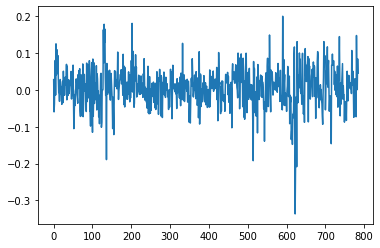

In [ ]:
# strategy returns
plt.plot(all_strat_returns)
plt.show()

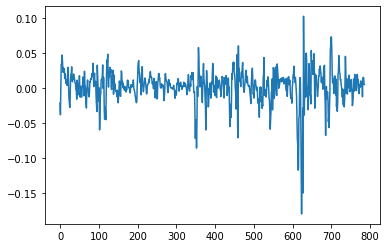

In [ ]:
# market returns
plt.plot(all_market_returns)
plt.show()

In [ ]:
top_strat = np.cumsum(all_strat_returns)

In [ ]:
import copy as cp
initial_strat_returns = cp.deepcopy(all_strat_returns)

In [ ]:
import copy as cp
best_strat_returns = cp.deepcopy(all_strat_returns)

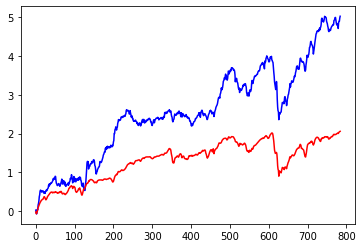

In [ ]:
# compare strategy vs market returns
plt.plot(np.cumsum(all_strat_returns), 'b', np.cumsum(all_market_returns), 'r')

In [ ]:
np.cumsum(all_strat_returns)[-1] - np.cumsum(all_market_returns)[-1]

7.119881544929513

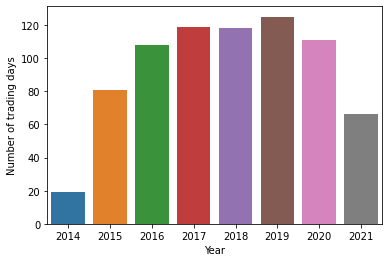

In [ ]:
all_trading_years = defaultdict(int)
for x in all_trading_days:
  all_trading_years[x.year] += 1
years = sorted(list(all_trading_years.keys()))
counts = [all_trading_years[year] for year in years]
trading_years_df = pd.DataFrame({'Year' : years, "Number of trading days" : counts})
sns.barplot(data=trading_years_df, x='Year', y='Number of trading days')

In [ ]:
cumm_betas

[-1.3459500146281991e-11,
 7.02155795185043e-07,
 -0.03289204982121647,
 2.3514949944371626,
 -2.209094570044407,
 -6.982433567392744,
 -0.29289614264304503,
 0.17076868392369374,
 3.212288758811564,
 5.177692559332522,
 0.759998670301841,
 -0.15566434813443908,
 -2.0321550385921494]

In [ ]:
new_dict = defaultdict(int)
for key in common_tickers:
  new_dict[key[0]] += 1

all_ticker_frequency = []
for key in new_dict:
  all_ticker_frequency.append((key, new_dict[key]),)
all_ticker_frequency.sort(key=lambda x : x[1])
list(reversed(all_ticker_frequency))

[('ADI', 16),
 ('MIXT', 15),
 ('AMAT', 15),
 ('SNPS', 14),
 ('MSFT', 13),
 ('TRMB', 12),
 ('MRVL', 12),
 ('INTU', 12),
 ('CSCO', 12),
 ('TEL', 11),
 ('TER', 11),
 ('APH', 11),
 ('KEYS', 10),
 ('HPQ', 10),
 ('STM', 10),
 ('NUAN', 10),
 ('SMTC', 10),
 ('ASML', 10),
 ('GLW', 10),
 ('ZNGA', 10),
 ('SSNC', 10),
 ('ADSK', 10),
 ('ERIC', 9),
 ('NTNX', 9),
 ('CALX', 9),
 ('ADP', 9),
 ('HLIT', 9),
 ('AMKR', 9),
 ('XRX', 9),
 ('PLAB', 9),
 ('CTSH', 9),
 ('TECD', 9),
 ('CIEN', 9),
 ('CSX', 8),
 ('RMBS', 8),
 ('SABR', 8),
 ('HON', 8),
 ('WU', 8),
 ('ON', 8),
 ('FDC', 8),
 ('SIRI', 8),
 ('GWRE', 8),
 ('CHKP', 8),
 ('BKI', 7),
 ('INTC', 7),
 ('TSM', 7),
 ('QADA', 7),
 ('VSAT', 7),
 ('LLNW', 7),
 ('LDOS', 7),
 ('TSEM', 7),
 ('NOK', 7),
 ('CDNS', 7),
 ('WNS', 7),
 ('MEI', 7),
 ('PEGA', 7),
 ('G', 7),
 ('ITW', 7),
 ('NTAP', 7),
 ('BAH', 7),
 ('SYMC', 7),
 ('FLEX', 7),
 ('JBL', 7),
 ('YNDX', 7),
 ('FLIR', 7),
 ('ADTN', 7),
 ('BMI', 6),
 ('SPNS', 6),
 ('HPE', 6),
 ('ACN', 6),
 ('COMM', 6),
 ('CLDR', 6),


([<matplotlib.patches.Wedge at 0x7ff3dc756a10>,
 [Text(0.7871598634145289, 0.7683614705522528, 'Information Technology'),
  Text(-0.618900994376753, 0.909374267922436, 'Consumer Discretionary'),
  Text(-1.0897472308474372, -0.14983648707955724, 'Industrials'),
  Text(-0.5116675508740162, -0.9737537252214167, 'Health Care'),
  Text(0.2122940082060807, -1.0793198108437538, 'Energy'),
  Text(0.6170943553804221, -0.9106012061037594, 'Financials'),
  Text(0.8873556517722194, -0.6500768779674445, 'Materials'),
  Text(1.0438977902154765, -0.3468103279650785, 'Consumer Staples'),
  Text(1.0928784290055582, -0.12496695328903358, 'Utilities'),
  Text(1.0994865136966958, -0.03360663921140999, 'Telecommunication Services')],
 [Text(0.4293599254988339, 0.4191062566648651, '25%'),
  Text(-0.337582360569138, 0.4960223279576923, '20%'),
  Text(-0.5944075804622384, -0.08172899295248576, '16%'),
  Text(-0.27909139138582695, -0.5311383955753182, '15%'),
  Text(0.11579673174877127, -0.5887198968238657, '7

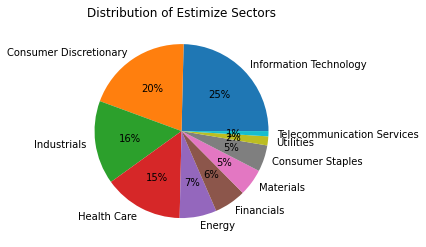

In [ ]:
plt.title('Distribution of Estimize Sectors')
plt.pie(list(final_df['instrument_sector'].value_counts()), labels=list(final_df['instrument_sector'].value_counts().index), autopct='%.0f%%')

In [ ]:
sector_to_freq = defaultdict(int)
for key in all_ticker_frequency:
  sector = list(final_df[final_df['TICKER'] == key[0]]['instrument_sector'])[0]
  sector_to_freq[sector] += key[1]
sector_to_freq

defaultdict(int,
            {'Consumer Discretionary': 174,
             'Energy': 7,
             'Financials': 44,
             'Health Care': 71,
             'Industrials': 286,
             'Information Technology': 1465,
             'Materials': 91,
             'Telecommunication Services': 14,
             'Utilities': 1})

In [ ]:
list(sector_to_freq.values())

[174, 71, 7, 286, 91, 1465, 1, 14, 44]

In [ ]:
data = [list(sector_to_freq.values())[5]] + [list(sector_to_freq.values())[0]] + [list(sector_to_freq.values())[3]] + [list(sector_to_freq.values())[1]] + [list(sector_to_freq.values())[2]] + [list(sector_to_freq.values())[-1]] + [list(sector_to_freq.values())[4]] + [list(sector_to_freq.values())[-3]] + [list(sector_to_freq.values())[-2]]

In [ ]:
final_df['instrument_sector'].value_counts()


Information Technology        8959
Consumer Discretionary        7203
Industrials                   5655
Health Care                   5355
Energy                        2500
Financials                    2150
Materials                     1823
Consumer Staples              1786
Utilities                      611
Telecommunication Services     354
Name: instrument_sector, dtype: int64

In [ ]:
labels = [list(sector_to_freq.keys())[5]] + [list(sector_to_freq.keys())[0]] + [list(sector_to_freq.keys())[3]] + [list(sector_to_freq.keys())[1]] + [list(sector_to_freq.keys())[2]] + [list(sector_to_freq.keys())[-1]] + [list(sector_to_freq.keys())[4]] + [list(sector_to_freq.keys())[-3]] + [list(sector_to_freq.keys())[-2]]

In [ ]:
data

2153

([<matplotlib.patches.Wedge at 0x7ff3db9e7490>,
 [Text(-0.5907099650364446, 0.9279341233119097, 'Information Technology'),
  Text(-0.20031428099019577, -1.0816072248424478, 'Consumer Discretionary'),
  Text(0.5158361184513915, -0.9715519023196868, 'Industrials'),
  Text(0.9309389435017872, -0.5859630393393225, 'Health Care'),
  Text(0.9914634366885023, -0.4764454362356977, 'Energy'),
  Text(1.0241425852653931, -0.401412462494523, 'Financials'),
  Text(1.082899220369385, -0.1932078635133121, 'Materials'),
  Text(1.099015302906691, -0.04653347157600471, 'Utilities'),
  Text(1.0997704859404374, -0.022469496085458455, 'Telecommunication Services')],
 [Text(-0.3222054354744243, 0.5061458854428598, '68%'),
  Text(-0.10926233508556131, -0.5899675771867896, '8%'),
  Text(0.2813651555189408, -0.5299374012652837, '13%'),
  Text(0.5077848782737021, -0.31961620327599405, '3%'),
  Text(0.5407982381937285, -0.2598793288558351, '0%'),
  Text(0.5586232283265781, -0.2189522522697398, '2%'),
  Text(0.59

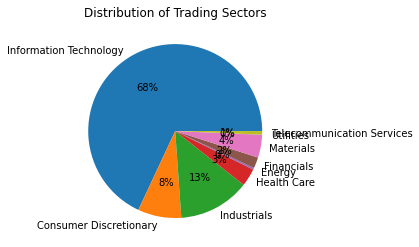

In [ ]:
plt.title('Distribution of Trading Sectors')
plt.pie(data, labels=labels, autopct='%.0f%%')

###Now, let's try improving our returns!

In [ ]:
all_strat_returns1 = []
all_market_returns = []

all_trading_days = []
common_tickers = defaultdict(int)

cumm_betas = [0] * 13

# 1. loop through each date
for today in sorted(list(set(final_df['date'])))[150:]:
  ranks = []
  temp_df = pd.get_dummies(final_df, columns=['instrument_sector'])
  today_df = temp_df[temp_df['date'] == today]
  prev_df = temp_df[temp_df['date'] <= today]

  # 2. check to is if there is at least 10 companies that announce in future
  if len(today_df['TICKER'].value_counts()) < 10:
    print("Not trading on ", today)
    continue

  # 3. run regression on past history  
  Y = prev_df[['compounded_return']]
  X = prev_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count', 'instrument_sector_Consumer Discretionary',
        'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
        'instrument_sector_Financials', 'instrument_sector_Health Care',
        'instrument_sector_Industrials',
        'instrument_sector_Information Technology',
        'instrument_sector_Materials',
        'instrument_sector_Telecommunication Services',
        'instrument_sector_Utilities']]

  # with sklearn
  regr = linear_model.LinearRegression()
  regr.fit(X, Y)

  for i in range(len(X.columns)):
    cumm_betas[i] += regr.coef_[0][i]

  # 4. make predictions for today
  for ticker in set(today_df['TICKER']):
    pred_returns = regr.intercept_[0] + sum([regr.coef_[0][i] * list(today_df[today_df['TICKER']==ticker][col])[0] for i, col in enumerate(X.columns)])
    ranks.append((ticker, pred_returns),)
    # print(ticker,test_accuracy)
  
  # 5. select top 5 predicted returns and build portfolio
  ranks.sort(key=lambda x : x[1])
  ranks = list(reversed(ranks))
  top_returns = []
  for ticker in ranks[:5]:
    individual_ret = sum(today_df[today_df['TICKER']==ticker[0]]['compounded_return'])
    if ticker[1] > 0:
      common_tickers[ticker[0]] += 1
      top_returns.append(individual_ret)
  if len(top_returns) < 1:
    print("Not trading on ", today)
    continue

  strat_returns = sum(top_returns) / len(top_returns) # equal-weighted
  market_returns = list(today_df['market_compounded_return'])[0]
  
  all_strat_returns1.append(strat_returns)
  all_market_returns.append(market_returns)

  all_trading_days.append(today)


Not trading on  2014-09-10
Not trading on  2014-09-11
Not trading on  2014-09-12
Not trading on  2014-09-16
Not trading on  2014-09-17
Not trading on  2014-09-18
Not trading on  2014-09-19
Not trading on  2014-09-22
Not trading on  2014-09-24
Not trading on  2014-09-25
Not trading on  2014-09-26
Not trading on  2014-09-30
Not trading on  2014-10-01
Not trading on  2014-10-02
Not trading on  2014-10-03
Not trading on  2014-10-06
Not trading on  2014-10-10
Not trading on  2014-10-27
Not trading on  2014-11-03
Not trading on  2014-11-04
Not trading on  2014-11-05
Not trading on  2014-11-06
Not trading on  2014-11-07
Not trading on  2014-11-10
Not trading on  2014-11-12
Not trading on  2014-11-13
Not trading on  2014-11-17
Not trading on  2014-11-18
Not trading on  2014-11-20
Not trading on  2014-11-24
Not trading on  2014-11-25
Not trading on  2014-11-26
Not trading on  2014-12-01
Not trading on  2014-12-02
Not trading on  2014-12-03
Not trading on  2014-12-04
Not trading on  2014-12-05
N

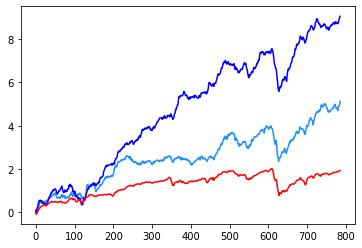

In [ ]:
# compare strategy vs market returns
plt.plot(np.cumsum(all_strat_returns)[:len(all_strat_returns1)], 'dodgerblue', np.cumsum(all_strat_returns1), 'b', np.cumsum(all_market_returns), 'r')

#Appendix: EDA

In [ ]:
import math
import pandas as pd
import numpy as np
import calendar
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import dates
from datetime import datetime
from matplotlib.patches import Patch
import matplotlib.font_manager as font_manager

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
consensus = pd.read_csv("/content/combined_consensus_new.csv")
consensus.columns

The descriptive summary is basically telling the rational of our further regression analysis. We are expecting estimize is doing a better job than WS in estimating the actual EPS as it becomes closer to annoucement date. If Estimize is providing more info than the market, we should gain abnoraml return based on certain strategy using Estimize data.

In [ ]:
consensus['date'] = pd.to_datetime(consensus['date'])
consensus['accuracy_ES'] = consensus['estimize.eps.weighted'] - consensus['actual.eps']
consensus['accuracy_WS'] = consensus['wallstreet.eps'] - consensus['actual.eps']

#create a new feature "accuracy" on whether Estimize or Wallstreet is more accurate 
consensus.loc[abs(consensus['accuracy_ES'])<abs(consensus['accuracy_WS']), 'accuracy'] = 'Estimize'
consensus.loc[abs(consensus['accuracy_ES'])>abs(consensus['accuracy_WS']), 'accuracy'] = 'Wallstreet'

In [ ]:
#drop all null value
consensus.dropna(inplace = True)

In [ ]:
#create a categorical feature to classify the number of contributors
def count_contributors(x):
    if x >=20:
        return ">=20"
    if x >=10:
        return "10-20"
    if x >=5:
        return "5-10"
    if x >=1:
        return "1-5"
  
consensus["count_contributors"] = consensus["estimize.eps.count"].apply(count_contributors)
consensus["count_contributors"].value_counts()

1-5      2067761
5-10     1879546
10-20     671420
>=20      330024
Name: count_contributors, dtype: int64

In [ ]:
print(np.shape(consensus)[0])

4948751


In [ ]:
consensus["day"] = consensus["date"].dt.day
consensus["month"] = consensus["date"].dt.month
consensus["year"] = consensus["date"].dt.year
consensus["weekday"] = consensus["date"].dt.weekday

In [ ]:
date = consensus.groupby(['date','count_contributors']).size().unstack(level=1).reindex(columns=['1-5', '5-10','10-20','>=20'])

Text(0, 0.5, 'Number of stocks covered by Estimize')

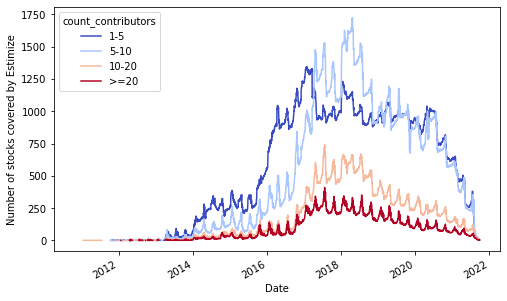

In [ ]:
date.plot(kind = 'line',figsize=(8,5),colormap='coolwarm')
plt.xlabel('Date') # label the x-axis (discussed in chapter 6)
plt.ylabel('Number of stocks covered by Estimize')

In [ ]:
sector = consensus.groupby(['instrument_sector','accuracy']).instrument_sector.count().unstack(level=1).sort_values('Estimize',ascending=True)

Text(0, 0.5, 'Sector')

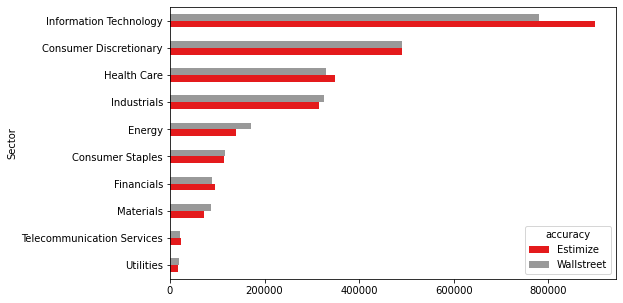

In [ ]:
sector.plot.barh(figsize=(8,5),colormap='Set1', 
        stacked=False, 
    )
plt.ylabel('Sector')

In [ ]:
count_contributors = consensus.groupby(['accuracy','count_contributors']).size().unstack(level=1).reindex(columns=['1-5', '5-10','10-20','>=20'])

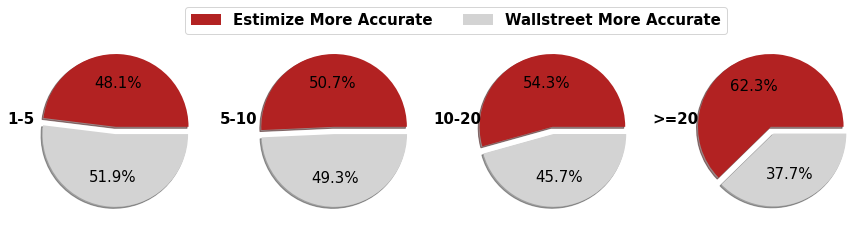

In [ ]:
# plot and add labels
labels = ["Estimize More Accurate", "Wallstreet More Accurate"]  # used for the legend
colors = ['firebrick', 'lightgray']  # specify the colors so they can be used in the legend
explode = (0, 0.1) 
axes = count_contributors.plot(kind='pie',explode=explode, shadow=True, autopct='%.1f%%', subplots=True, figsize=(15, 5),legend=False, labels=['', ''], colors=colors,fontsize=15)

# flatten the array of axes
axes = axes.flat

# extract the figure object
fig = axes[0].get_figure()

# rotate the pclass label
for i,ax in enumerate(axes):
    yl = ax.get_ylabel()
    ax.set_ylabel(yl, rotation=0, fontsize=15,fontweight='bold')
    #ax.pie(count_contributors.iloc[:,i],radius=r[i])
font = font_manager.FontProperties(family= 'Times new roman',  # 'Times new roman', 
                                   weight='bold',
                                   style='normal', size=15)
plt.legend(labels=labels, prop=font,
           bbox_to_anchor=(0., 0.6, .3, .6), ncol=2)
#fig.tight_layout()

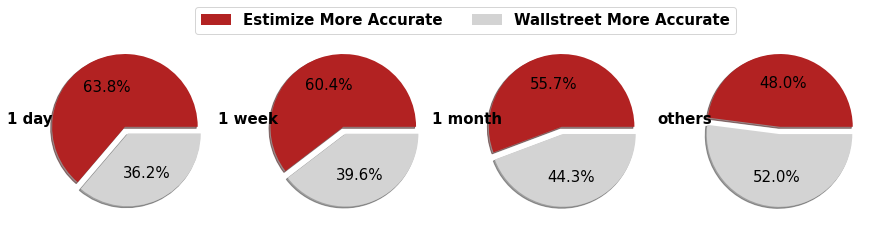

In [ ]:
consensus['reports_at'] = pd.to_datetime(consensus['reports_at'],utc=True)

consensus['reports_at'] = consensus['reports_at'].dt.tz_convert(None)
consensus['LeadTime'] =consensus['reports_at'] - consensus['date']
consensus['LeadTime']=consensus['LeadTime'].dt.days

#create a categorical feature to classify the lead time of estimates
def count_LeadTime(x):
    if x <=1:
        return "1 day"
    if x <=7:
        return "1 week"
    if x <=30:
        return "1 month"

    if x >30:
        return "others"
  
consensus["count_LeadTime"] = consensus["LeadTime"].apply(count_LeadTime)
consensus["count_LeadTime"].value_counts()

consensus['date'] = pd.to_datetime(consensus['date'])
consensus['accuracy_ES'] = consensus['estimize.eps.weighted'] - consensus['actual.eps']
consensus['accuracy_WS'] = consensus['wallstreet.eps'] - consensus['actual.eps']

#create a new feature "accuracy" on whether Estimize or Wallstreet is more accurate 
consensus.loc[abs(consensus['accuracy_ES'])<abs(consensus['accuracy_WS']), 'accuracy'] = 'Estimize'
consensus.loc[abs(consensus['accuracy_ES'])>abs(consensus['accuracy_WS']), 'accuracy'] = 'Wallstreet'
LeadTime = consensus.groupby(['accuracy','count_LeadTime']).size().unstack(level=1).reindex(columns=['1 day', '1 week','1 month','others'])
LeadTime.iloc[:,1]

# plot and add labels
labels = ["Estimize More Accurate", "Wallstreet More Accurate"]  # used for the legend
colors = ['firebrick', 'lightgray']  # specify the colors so they can be used in the legend
explode = (0, 0.1) 
axes = LeadTime.plot(kind='pie',explode=explode, shadow=True, autopct='%.1f%%', subplots=True, figsize=(15, 5),legend=False, labels=['', ''], colors=colors,fontsize=15)

# flatten the array of axes
axes = axes.flat

# extract the figure object
fig = axes[0].get_figure()

# rotate the pclass label
for i,ax in enumerate(axes):
    yl = ax.get_ylabel()
    ax.set_ylabel(yl, rotation=0, fontsize=15,fontweight='bold')
    #ax.pie(count_contributors.iloc[:,i],radius=r[i])
font = font_manager.FontProperties(family= 'Times new roman',  # 'Times new roman', 
                                   weight='bold',
                                   style='normal', size=15)
plt.legend(labels=labels, prop=font,
           bbox_to_anchor=(0., 0.6, .3, .6), ncol=2)
#fig.tight_layout()

#Appendix: Binary Classification

##Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

All sectors combined

In [ ]:
logr_df = final_df.dropna()

In [ ]:
logr_df = logr_df[logr_df['instrument_sector'] == 'Information Technology']

In [ ]:
logr_df = pd.get_dummies(logr_df, columns=['instrument_sector'])

The accuracy by using label1: 0.5012087912087912 , and label2:  0.7596703296703297
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.572


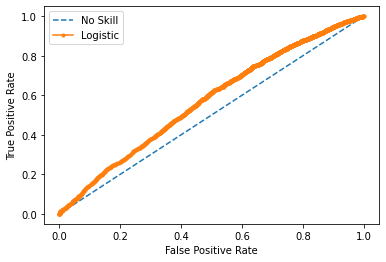

In [ ]:
Y = logr_df[['label1']]
X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count', 'instrument_sector_Consumer Discretionary',
       'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
       'instrument_sector_Financials', 'instrument_sector_Health Care',
       'instrument_sector_Industrials',
       'instrument_sector_Information Technology',
       'instrument_sector_Materials',
       'instrument_sector_Telecommunication Services',
       'instrument_sector_Utilities']]

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = LogisticRegression().fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label1'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
temp = test_accuracy

# Now, we use the <-0.02 and >0.02 abnormal returns label: label1
Y = logr_df[['label2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = LogisticRegression().fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label2'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
print('The accuracy by using label1:', temp, ', and label2: ', test_accuracy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = [1-x for x in lr_probs[:, 1]]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

----------------------------------------- Financials -----------------------------------------
The accuracy by using label: 0.5 , and label1:  0.3420074349442379
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

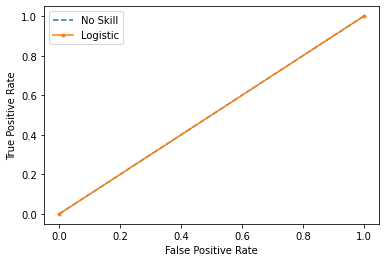

----------------------------------------- Consumer Staples -----------------------------------------
The accuracy by using label: 0.5480984340044742 , and label1:  0.7069351230425056
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.579


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


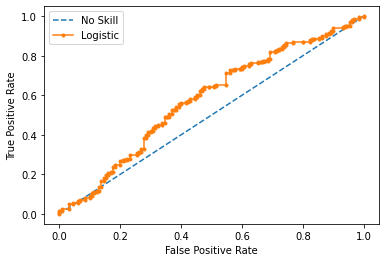

----------------------------------------- Information Technology -----------------------------------------
The accuracy by using label: 0.5178571428571429 , and label1:  0.7848214285714286
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.543


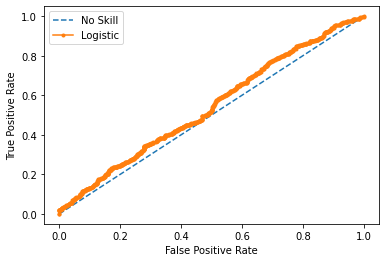

----------------------------------------- Materials -----------------------------------------
The accuracy by using label: 0.506578947368421 , and label1:  0.743421052631579
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.573


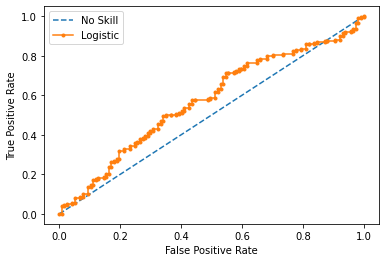

----------------------------------------- Health Care -----------------------------------------
The accuracy by using label: 0.5115758028379388 , and label1:  0.7714712471994025
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.564


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


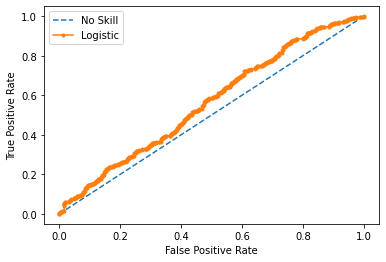

----------------------------------------- Consumer Discretionary -----------------------------------------
The accuracy by using label: 0.5024986118822876 , and label1:  0.8006662965019433
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.553


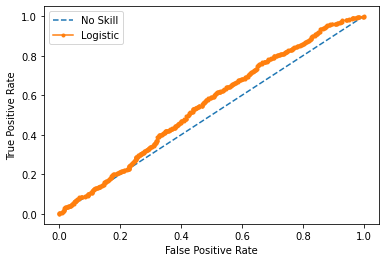

----------------------------------------- Telecommunication Services -----------------------------------------
The accuracy by using label: 0.48314606741573035 , and label1:  0.16853932584269662
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

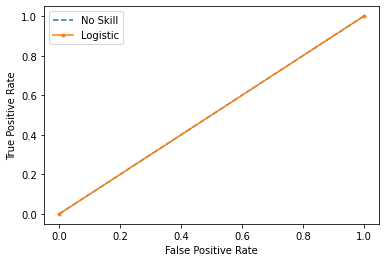

----------------------------------------- Industrials -----------------------------------------
The accuracy by using label: 0.49363507779349364 , and label1:  0.7432814710042432
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.583


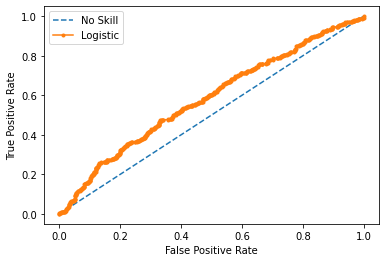

----------------------------------------- Utilities -----------------------------------------
The accuracy by using label: 0.5228758169934641 , and label1:  0.5294117647058824
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.525


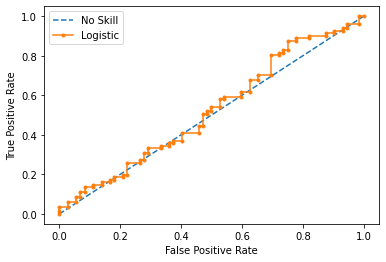

----------------------------------------- Energy -----------------------------------------
The accuracy by using label: 0.5830670926517572 , and label1:  0.7667731629392971
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.569


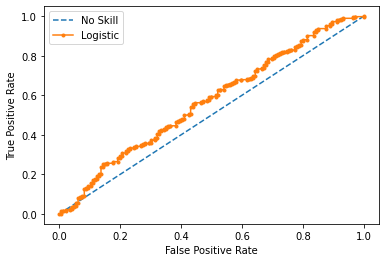

In [ ]:
for sector in all_sectors:

  print('-----------------------------------------', sector, '-----------------------------------------')

  logr_df = final_df.dropna()
  # sector is filtered below
  logr_df = logr_df[logr_df['instrument_sector'] == sector] #[logr_df['estimize.eps.count']>=20]
  
  Y = logr_df[['label1']]
  X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']]

  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = LogisticRegression().fit(x_train, y_train)
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label1'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)
  temp = test_accuracy

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))


  # Now, we use the <-0.02 and >0.02 abnormal returns label: label1
  Y = logr_df[['label2']]
  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = LogisticRegression().fit(x_train, y_train)
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label2'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))

  print('The accuracy by using label:', temp, ', and label1: ', test_accuracy)



  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test))]
  # predict probabilities
  lr_probs = clf.predict_proba(x_test)
  # keep probabilities for the positive outcome only
  lr_probs = [1-x for x in lr_probs[:, 1]]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

All sectors combined

In [ ]:
logr_df = final_df.dropna()

In [ ]:
logr_df = pd.get_dummies(logr_df, columns=['instrument_sector'])

The accuracy by using label1: 0.5027472527472527 , and label2:  0.6467032967032967
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.514


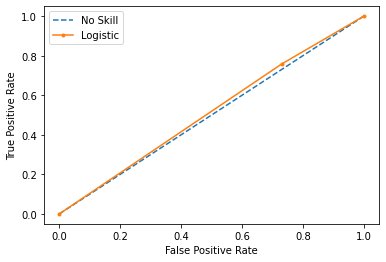

In [ ]:
Y = logr_df[['label1']]
X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count', 'instrument_sector_Consumer Discretionary',
       'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
       'instrument_sector_Financials', 'instrument_sector_Health Care',
       'instrument_sector_Industrials',
       'instrument_sector_Information Technology',
       'instrument_sector_Materials',
       'instrument_sector_Telecommunication Services',
       'instrument_sector_Utilities']]

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label1'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
temp = test_accuracy

# Now, we use the <-0.02 and >0.02 abnormal returns label: label1
Y = logr_df[['label2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label2'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
print('The accuracy by using label1:', temp, ', and label2: ', test_accuracy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = [x for x in lr_probs[:, 1]]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

----------------------------------------- Financials -----------------------------------------
The accuracy by using label: 0.5297397769516728 , and label1:  0.570631970260223
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.524


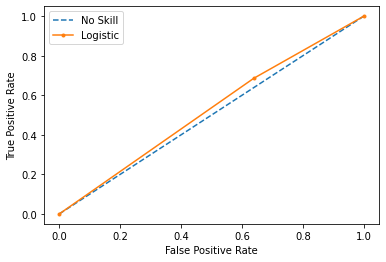

----------------------------------------- Consumer Staples -----------------------------------------
The accuracy by using label: 0.4809843400447427 , and label1:  0.6152125279642058
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.542


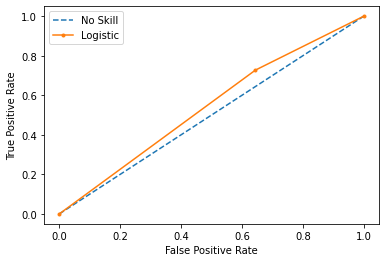

----------------------------------------- Information Technology -----------------------------------------
The accuracy by using label: 0.5022321428571429 , and label1:  0.6785714285714286
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.518


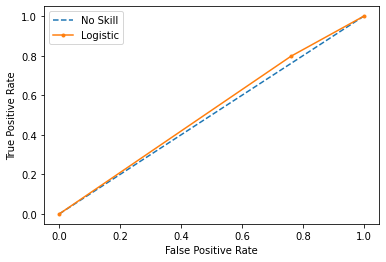

----------------------------------------- Materials -----------------------------------------
The accuracy by using label: 0.543859649122807 , and label1:  0.618421052631579
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.511


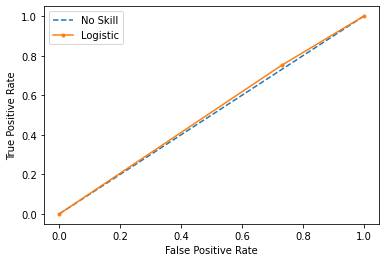

----------------------------------------- Health Care -----------------------------------------
The accuracy by using label: 0.4936519790888723 , and label1:  0.6123973114264376
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.461


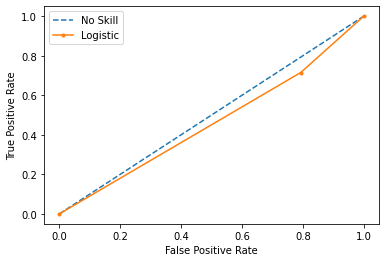

----------------------------------------- Consumer Discretionary -----------------------------------------
The accuracy by using label: 0.5108273181565797 , and label1:  0.6812881732370905
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.509


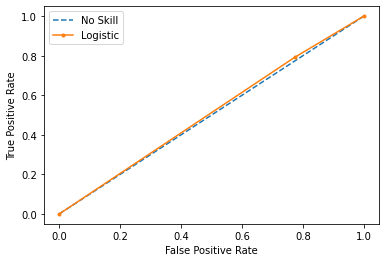

----------------------------------------- Telecommunication Services -----------------------------------------
The accuracy by using label: 0.4606741573033708 , and label1:  0.7191011235955056
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.635


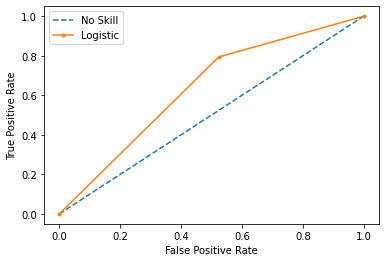

----------------------------------------- Industrials -----------------------------------------
The accuracy by using label: 0.5099009900990099 , and label1:  0.6258840169731259
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.514


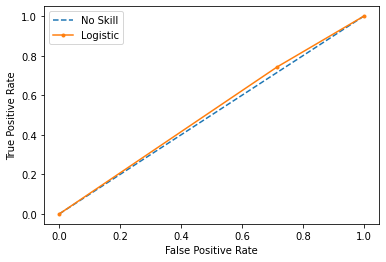

----------------------------------------- Utilities -----------------------------------------
The accuracy by using label: 0.5555555555555556 , and label1:  0.5424836601307189
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.542


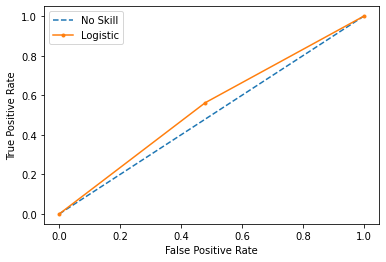

----------------------------------------- Energy -----------------------------------------
The accuracy by using label: 0.5031948881789138 , and label1:  0.6293929712460063
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.528


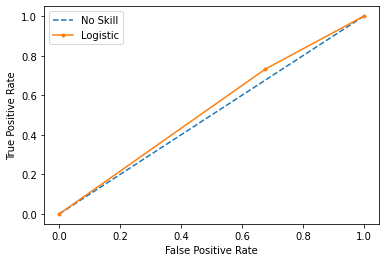

In [ ]:
for sector in all_sectors:

  print('-----------------------------------------', sector, '-----------------------------------------')

  logr_df = final_df.dropna()
  # sector is filtered below
  logr_df = logr_df[logr_df['instrument_sector'] == sector] #[logr_df['estimize.eps.count']>=20]
  
  Y = logr_df[['label1']]
  X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']]

  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)  
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label1'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)
  temp = test_accuracy

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))


  # Now, we use the <-0.02 and >0.02 abnormal returns label: label1
  Y = logr_df[['label2']]
  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label2'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))

  print('The accuracy by using label:', temp, ', and label1: ', test_accuracy)



  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test))]
  # predict probabilities
  lr_probs = clf.predict_proba(x_test)
  # keep probabilities for the positive outcome only
  lr_probs = [x for x in lr_probs[:, 1]]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

All sectors combined

In [ ]:
logr_df = final_df.dropna()

In [ ]:
logr_df = pd.get_dummies(logr_df, columns=['instrument_sector'])

The accuracy by using label1: 0.5115384615384615 , and label2:  0.7285714285714285
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.553


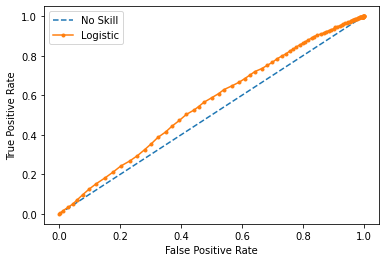

In [ ]:
Y = logr_df[['label1']]
X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count', 'instrument_sector_Consumer Discretionary',
       'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
       'instrument_sector_Financials', 'instrument_sector_Health Care',
       'instrument_sector_Industrials',
       'instrument_sector_Information Technology',
       'instrument_sector_Materials',
       'instrument_sector_Telecommunication Services',
       'instrument_sector_Utilities']]

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = RandomForestClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label1'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
temp = test_accuracy

# Now, we use the <-0.02 and >0.02 abnormal returns label: label1
Y = logr_df[['label2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = RandomForestClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label2'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
print('The accuracy by using label1:', temp, ', and label2: ', test_accuracy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = [x for x in lr_probs[:, 1]]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

----------------------------------------- Financials -----------------------------------------
The accuracy by using label: 0.5 , and label1:  0.6078066914498141
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.516


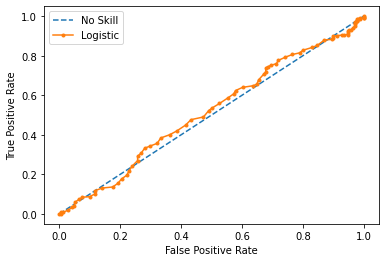

----------------------------------------- Consumer Staples -----------------------------------------
The accuracy by using label: 0.49217002237136465 , and label1:  0.6554809843400448
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.527


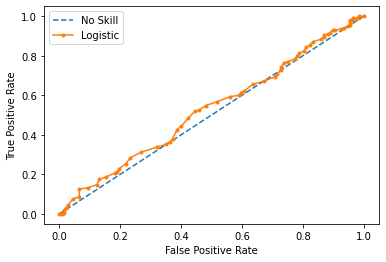

----------------------------------------- Information Technology -----------------------------------------
The accuracy by using label: 0.5138392857142857 , and label1:  0.7767857142857143
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.536


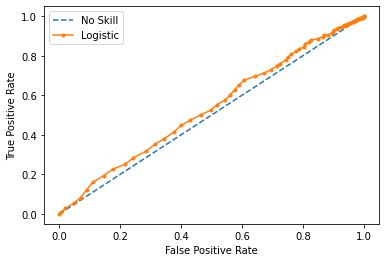

----------------------------------------- Materials -----------------------------------------
The accuracy by using label: 0.5328947368421053 , and label1:  0.6754385964912281
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.532


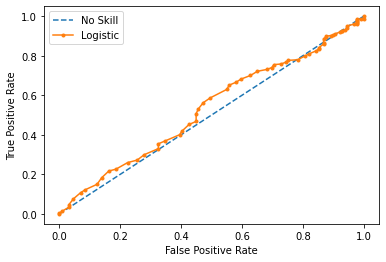

----------------------------------------- Health Care -----------------------------------------
The accuracy by using label: 0.5070948469006722 , and label1:  0.7498132935026139
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.522


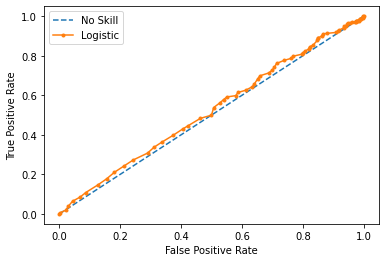

----------------------------------------- Consumer Discretionary -----------------------------------------
The accuracy by using label: 0.495835646862854 , and label1:  0.7767906718489728
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.538


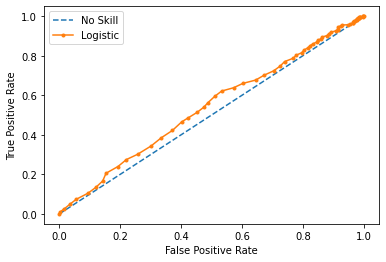

----------------------------------------- Telecommunication Services -----------------------------------------
The accuracy by using label: 0.4606741573033708 , and label1:  0.7752808988764045
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.706


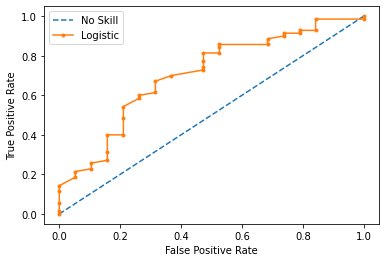

----------------------------------------- Industrials -----------------------------------------
The accuracy by using label: 0.5077793493635078 , and label1:  0.7072135785007072
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.550


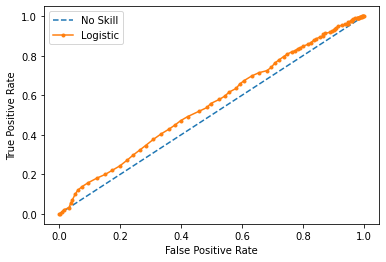

----------------------------------------- Utilities -----------------------------------------
The accuracy by using label: 0.5032679738562091 , and label1:  0.48366013071895425
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.498


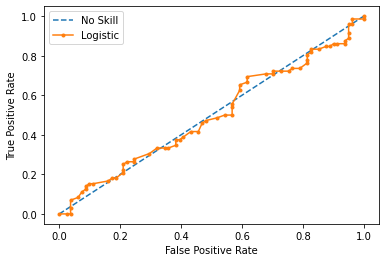

----------------------------------------- Energy -----------------------------------------
The accuracy by using label: 0.4952076677316294 , and label1:  0.7252396166134185
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.509


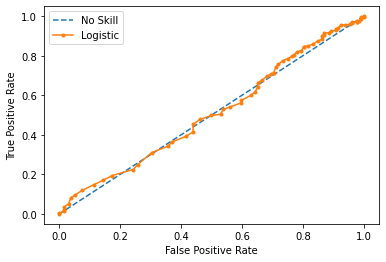

In [ ]:
for sector in all_sectors:

  print('-----------------------------------------', sector, '-----------------------------------------')

  logr_df = final_df.dropna()
  # sector is filtered below
  logr_df = logr_df[logr_df['instrument_sector'] == sector] #[logr_df['estimize.eps.count']>=20]
  
  Y = logr_df[['label1']]
  X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']]

  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = RandomForestClassifier().fit(x_train, y_train)  
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label1'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)
  temp = test_accuracy

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))


  # Now, we use the <-0.02 and >0.02 abnormal returns label: label1
  Y = logr_df[['label2']]
  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = RandomForestClassifier().fit(x_train, y_train)
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label2'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))

  print('The accuracy by using label:', temp, ', and label1: ', test_accuracy)



  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test))]
  # predict probabilities
  lr_probs = clf.predict_proba(x_test)
  # keep probabilities for the positive outcome only
  lr_probs = [x for x in lr_probs[:, 1]]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

All sectors combined

In [ ]:
logr_df = final_df.dropna()

In [ ]:
logr_df = pd.get_dummies(logr_df, columns=['instrument_sector'])

The accuracy by using label1: 0.49021978021978024 , and label2:  0.7623076923076924
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.582


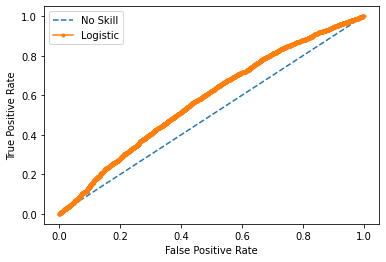

In [ ]:
Y = logr_df[['label1']]
X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count', 'instrument_sector_Consumer Discretionary',
       'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
       'instrument_sector_Financials', 'instrument_sector_Health Care',
       'instrument_sector_Industrials',
       'instrument_sector_Information Technology',
       'instrument_sector_Materials',
       'instrument_sector_Telecommunication Services',
       'instrument_sector_Utilities']]

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = GaussianNB().fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label1'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
temp = test_accuracy

# Now, we use the <-0.02 and >0.02 abnormal returns label: label1
Y = logr_df[['label2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = GaussianNB().fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label2'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
print('The accuracy by using label1:', temp, ', and label2: ', test_accuracy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = [x for x in lr_probs[:, 1]]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

----------------------------------------- Financials -----------------------------------------
The accuracy by using label: 0.4962825278810409 , and label1:  0.3420074349442379
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.581


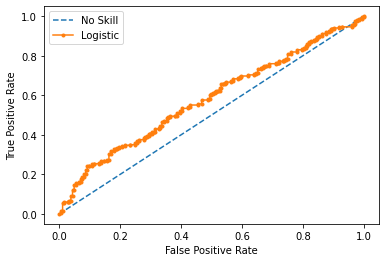

----------------------------------------- Consumer Staples -----------------------------------------
The accuracy by using label: 0.5145413870246085 , and label1:  0.28187919463087246
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.542


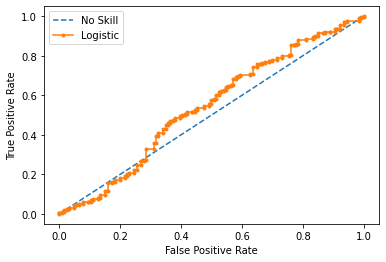

----------------------------------------- Information Technology -----------------------------------------
The accuracy by using label: 0.5459821428571429 , and label1:  0.19732142857142856
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.516


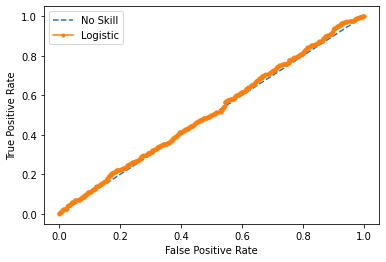

----------------------------------------- Materials -----------------------------------------
The accuracy by using label: 0.48026315789473684 , and label1:  0.30701754385964913
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.574


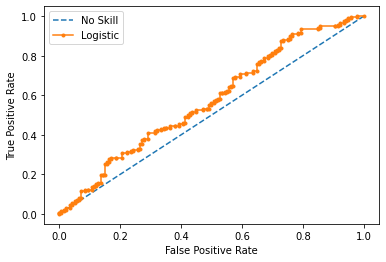

----------------------------------------- Health Care -----------------------------------------
The accuracy by using label: 0.46228528752800596 , and label1:  0.2292755787901419
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.574


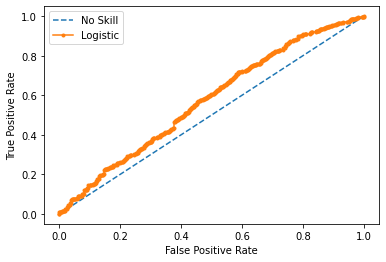

----------------------------------------- Consumer Discretionary -----------------------------------------
The accuracy by using label: 0.5152692948362021 , and label1:  0.1960022209883398
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.575


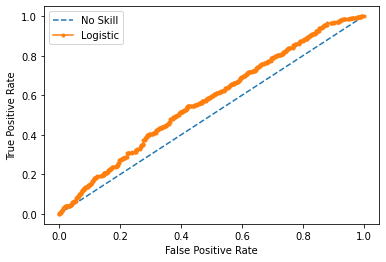

----------------------------------------- Telecommunication Services -----------------------------------------
The accuracy by using label: 0.449438202247191 , and label1:  0.20224719101123595
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.492


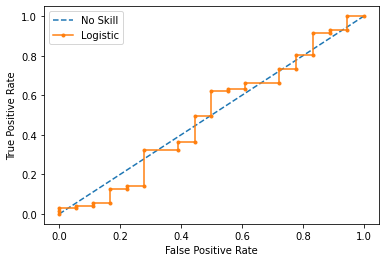

----------------------------------------- Industrials -----------------------------------------
The accuracy by using label: 0.5106082036775106 , and label1:  0.2524752475247525
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.567


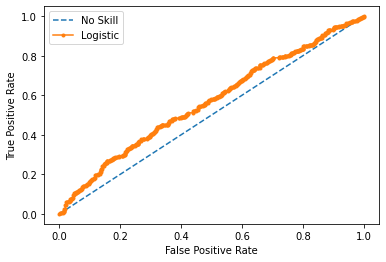

----------------------------------------- Utilities -----------------------------------------
The accuracy by using label: 0.45751633986928103 , and label1:  0.49673202614379086
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.513


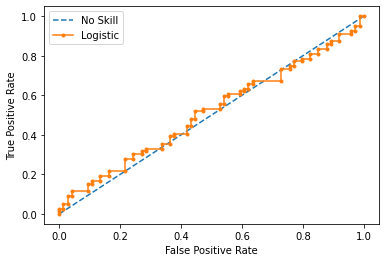

----------------------------------------- Energy -----------------------------------------
The accuracy by using label: 0.43929712460063897 , and label1:  0.7635782747603834
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.578


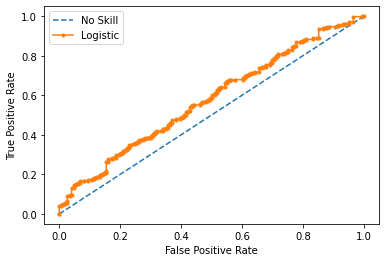

In [ ]:
for sector in all_sectors:

  print('-----------------------------------------', sector, '-----------------------------------------')

  logr_df = final_df.dropna()
  # sector is filtered below
  logr_df = logr_df[logr_df['instrument_sector'] == sector] #[logr_df['estimize.eps.count']>=20]
  
  Y = logr_df[['label1']]
  X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']]

  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = GaussianNB().fit(x_train, y_train)  
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label1'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)
  temp = test_accuracy

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))


  # Now, we use the <-0.02 and >0.02 abnormal returns label: label1
  Y = logr_df[['label2']]
  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = GaussianNB().fit(x_train, y_train)
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label2'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))

  print('The accuracy by using label:', temp, ', and label1: ', test_accuracy)



  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test))]
  # predict probabilities
  lr_probs = clf.predict_proba(x_test)
  # keep probabilities for the positive outcome only
  lr_probs = [x for x in lr_probs[:, 1]]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()


## Portfolio based on binary classification

## Support Vector


In [ ]:
from sklearn.svm import SVC

All sectors combined

In [ ]:
logr_df = final_df.dropna()

In [ ]:
logr_df = pd.get_dummies(logr_df, columns=['instrument_sector'])

The accuracy by using label1: 0.5034065934065934 , and label2:  0.7678021978021978
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.419


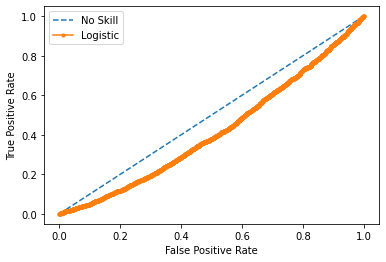

In [ ]:
Y = logr_df[['label1']]
X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count', 'instrument_sector_Consumer Discretionary',
       'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
       'instrument_sector_Financials', 'instrument_sector_Health Care',
       'instrument_sector_Industrials',
       'instrument_sector_Information Technology',
       'instrument_sector_Materials',
       'instrument_sector_Telecommunication Services',
       'instrument_sector_Utilities']]

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = SVC(probability=True).fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label1'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
temp = test_accuracy

# Now, we use the <-0.02 and >0.02 abnormal returns label: label1
Y = logr_df[['label2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf = SVC(probability=True).fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
y_test = np.array(y_test['label2'])
test_accuracy = sum(y_pred == y_test)/len(y_test)
print('The accuracy by using label1:', temp, ', and label2: ', test_accuracy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = [x for x in lr_probs[:, 1]]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

----------------------------------------- Financials -----------------------------------------
The accuracy by using label: 0.49814126394052044 , and label1:  0.6654275092936803
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.525


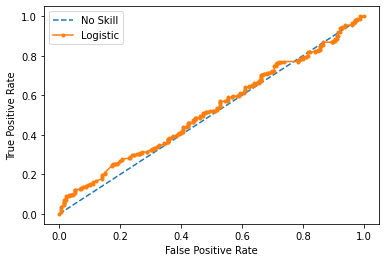

----------------------------------------- Consumer Staples -----------------------------------------
The accuracy by using label: 0.5167785234899329 , and label1:  0.6823266219239373
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.570


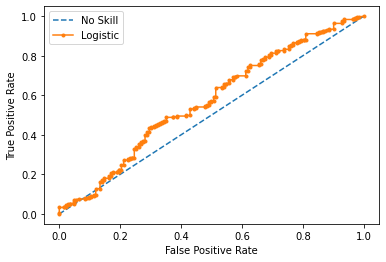

----------------------------------------- Information Technology -----------------------------------------
The accuracy by using label: 0.53125 , and label1:  0.8017857142857143
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.416


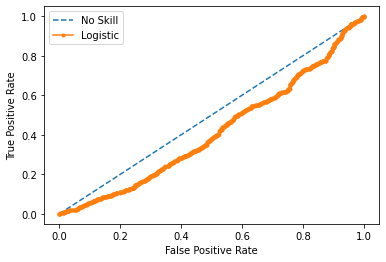

----------------------------------------- Materials -----------------------------------------
The accuracy by using label: 0.4824561403508772 , and label1:  0.7368421052631579
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.470


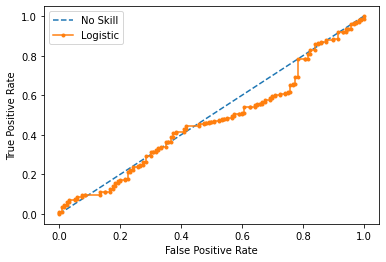

----------------------------------------- Health Care -----------------------------------------
The accuracy by using label: 0.5392083644510829 , and label1:  0.7759522031366691
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.423


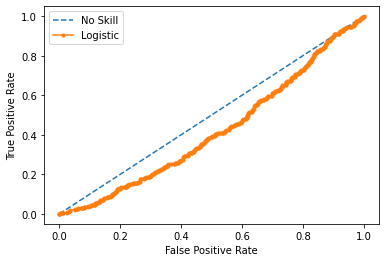

----------------------------------------- Consumer Discretionary -----------------------------------------
The accuracy by using label: 0.4963908939478068 , and label1:  0.8039977790116601
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.560


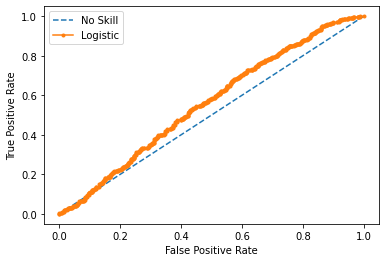

----------------------------------------- Telecommunication Services -----------------------------------------
The accuracy by using label: 0.48314606741573035 , and label1:  0.7865168539325843
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.593


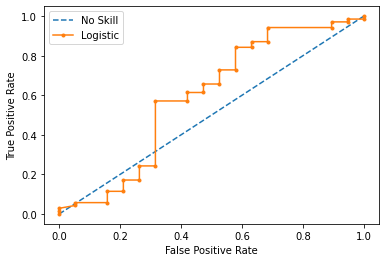

----------------------------------------- Industrials -----------------------------------------
The accuracy by using label: 0.5028288543140028 , and label1:  0.7284299858557284
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.578


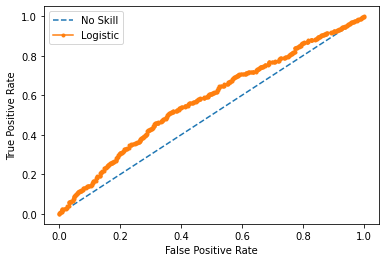

----------------------------------------- Utilities -----------------------------------------
The accuracy by using label: 0.5294117647058824 , and label1:  0.5294117647058824
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.542


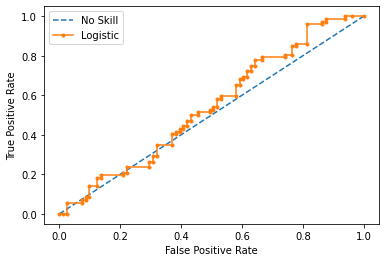

----------------------------------------- Energy -----------------------------------------
The accuracy by using label: 0.5702875399361023 , and label1:  0.7587859424920128
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.574


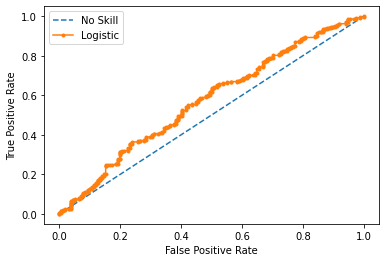

In [ ]:
for sector in all_sectors:

  print('-----------------------------------------', sector, '-----------------------------------------')

  logr_df = final_df.dropna()
  # sector is filtered below
  logr_df = logr_df[logr_df['instrument_sector'] == sector] #[logr_df['estimize.eps.count']>=20]
  
  Y = logr_df[['label1']]
  X = logr_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']]

  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = SVC(probability=True).fit(x_train, y_train)  
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label1'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)
  temp = test_accuracy

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))


  # Now, we use the <-0.02 and >0.02 abnormal returns label: label1
  Y = logr_df[['label2']]
  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  clf = SVC(probability=True).fit(x_train, y_train)
  clf.score(x_test, y_test)
  y_pred = clf.predict(x_test)
  y_test = np.array(y_test['label2'])
  test_accuracy = sum(y_pred == y_test)/len(y_test)

  # pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # pipe.fit(x_train, y_train)  # apply scaling on training data
  # Pipeline(steps=[('standardscaler', StandardScaler()),
  #                 ('logisticregression', LogisticRegression())])

  # print(pipe.score(x_test, y_test))

  print('The accuracy by using label:', temp, ', and label1: ', test_accuracy)



  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test))]
  # predict probabilities
  lr_probs = clf.predict_proba(x_test)
  # keep probabilities for the positive outcome only
  lr_probs = [x for x in lr_probs[:, 1]]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()


In [ ]:
final_df

,date,TICKER,CUSIP,fiscal_quarter,reports_at,estimize.eps.weighted,wallstreet.eps,diff.eps,instrument_sector,estimize.eps.count,SHROUT,compounded_return,label1,label2,diff.eps.scaled
0,2014-04-23,MLM,57328410,1,2014-04-29,-0.300251,-0.311000,0.010749,Materials,3.0,46159.0,-0.023989,0,1,0.034561
1,2014-07-23,MLM,57328410,2,2014-07-29,1.260868,1.227000,0.033868,Materials,3.0,66919.0,-0.015102,0,0,0.027603
2,2014-10-22,MLM,57328410,3,2014-10-28,1.719912,1.687000,0.032912,Materials,4.0,66919.0,-0.062661,0,1,0.019509
3,2015-02-04,MLM,57328410,4,2015-02-10,0.850553,0.853000,-0.002447,Materials,4.0,67270.0,0.204093,1,1,-0.002869
4,2015-07-29,MLM,57328410,2,2015-08-04,1.642996,1.616000,0.026996,Materials,5.0,67481.0,0.085522,1,1,0.016705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37351,2021-07-23,ACI,01309110,1,2021-07-29,0.672845,0.689501,-0.016656,Consumer Staples,3.0,466511.0,0.071357,1,1,-0.024157
37353,2021-07-29,AERI,00771V10,2,2021-08-04,-0.657930,-0.680102,0.022172,Health Care,4.0,47234.0,-0.056093,0,1,0.032601
37354,2021-08-03,FLGT,35966410,2,2021-08-09,2.028226,2.756667,-0.728441,Health Care,5.0,29521.0,-0.034707,0,1,-0.264247
37355,2021-08-03,APPS,25400W10,1,2021-08-09,0.327591,0.312500,0.015091,Information Technology,4.0,96093.0,-0.054422,0,1,0.048292


In [ ]:
final_df[final_df['TICKER']=='SPDR']

,date,TICKER,CUSIP,fiscal_quarter,reports_at,estimize.eps.weighted,wallstreet.eps,diff.eps,instrument_sector,estimize.eps.count,SHROUT,compounded_return,label1,label2,diff.eps.scaled


In [ ]:
final_df[final_df['TICKER']=='IVV']

,date,TICKER,CUSIP,fiscal_quarter,reports_at,estimize.eps.weighted,wallstreet.eps,diff.eps,instrument_sector,estimize.eps.count,SHROUT,compounded_return,label1,label2,diff.eps.scaled


In [ ]:
final_df[final_df['TICKER']=='VOO']

,date,TICKER,CUSIP,fiscal_quarter,reports_at,estimize.eps.weighted,wallstreet.eps,diff.eps,instrument_sector,estimize.eps.count,SHROUT,compounded_return,label1,label2,diff.eps.scaled


In [ ]:
tickers = list(set(final_df['TICKER']))
tickers.sort()

In [ ]:
tickers

['A',
 'AA',
 'AAC',
 'AAIC',
 'AAL',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAWW',
 'AAXN',
 'ABAX',
 'ABBV',
 'ABC',
 'ABCO',
 'ABEO',
 'ABG',
 'ABM',
 'ABMD',
 'ABNB',
 'ABT',
 'ABX',
 'ACAD',
 'ACAT',
 'ACB',
 'ACCO',
 'ACET',
 'ACHC',
 'ACI',
 'ACIA',
 'ACIW',
 'ACLS',
 'ACM',
 'ACN',
 'ACOR',
 'ACRX',
 'ACT',
 'ACTA',
 'ACTG',
 'ACXM',
 'ADAP',
 'ADBE',
 'ADI',
 'ADM',
 'ADMS',
 'ADP',
 'ADPT',
 'ADRO',
 'ADS',
 'ADSK',
 'ADTN',
 'ADUS',
 'AEE',
 'AEGN',
 'AEGR',
 'AEIS',
 'AEL',
 'AEM',
 'AEO',
 'AEP',
 'AER',
 'AERI',
 'AES',
 'AET',
 'AFAM',
 'AFFX',
 'AFL',
 'AFMD',
 'AFSI',
 'AG',
 'AGCO',
 'AGEN',
 'AGI',
 'AGIO',
 'AGN',
 'AGTC',
 'AGU',
 'AGX',
 'AHGP',
 'AHS',
 'AI',
 'AIG',
 'AIMC',
 'AIN',
 'AIR',
 'AIRM',
 'AIT',
 'AIZ',
 'AJG',
 'AJRD',
 'AKAM',
 'AKAO',
 'AKRX',
 'AKS',
 'AL',
 'ALB',
 'ALC',
 'ALE',
 'ALG',
 'ALGN',
 'ALGT',
 'ALK',
 'ALKS',
 'ALLE',
 'ALLT',
 'ALLY',
 'ALNY',
 'ALOG',
 'ALR',
 'ALRM',
 'ALSN',
 'ALTO',
 'ALTR',
 'ALU',
 'ALV',
 'ALXN',
 'AMAG',
 'AM

In [ ]:
final_df

,date,TICKER,CUSIP,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,wallstreet.eps,diff.eps,instrument_sector,estimize.eps.count,SHROUT,compounded_return,label1,label2,diff.eps.scaled
0,2014-04-23,MLM,57328410,2014,1,2014-04-29,-0.300251,-0.311000,0.010749,Materials,3.0,46159.0,-0.023989,0,1,0.034561
1,2014-07-23,MLM,57328410,2014,2,2014-07-29,1.260868,1.227000,0.033868,Materials,3.0,66919.0,-0.015102,0,0,0.027603
2,2014-10-22,MLM,57328410,2014,3,2014-10-28,1.719912,1.687000,0.032912,Materials,4.0,66919.0,-0.062661,0,1,0.019509
3,2015-02-04,MLM,57328410,2014,4,2015-02-10,0.850553,0.853000,-0.002447,Materials,4.0,67270.0,0.204093,1,1,-0.002869
4,2015-07-29,MLM,57328410,2015,2,2015-08-04,1.642996,1.616000,0.026996,Materials,5.0,67481.0,0.085522,1,1,0.016705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37351,2021-07-23,ACI,01309110,2021,1,2021-07-29,0.672845,0.689501,-0.016656,Consumer Staples,3.0,466511.0,0.071357,1,1,-0.024157
37353,2021-07-29,AERI,00771V10,2021,2,2021-08-04,-0.657930,-0.680102,0.022172,Health Care,4.0,47234.0,-0.056093,0,1,0.032601
37354,2021-08-03,FLGT,35966410,2021,2,2021-08-09,2.028226,2.756667,-0.728441,Health Care,5.0,29521.0,-0.034707,0,1,-0.264247
37355,2021-08-03,APPS,25400W10,2022,1,2021-08-09,0.327591,0.312500,0.015091,Information Technology,4.0,96093.0,-0.054422,0,1,0.048292


In [ ]:
cumulative_returns = []
individual_returns = []
cumulative_var = 0
for fiscal_year in sorted(list(set(final_df['fiscal_year']))):
  for fiscal_quarter in [1, 2, 3, 4]:
    print('----------------------------------', fiscal_year, " ", fiscal_quarter, '----------------------------------')
    ranks = []
    temp_df = final_df.dropna()
    temp_df = temp_df[temp_df['fiscal_year'] == fiscal_year][temp_df['fiscal_quarter'] == fiscal_quarter]
    if len(temp_df) < 10:
      print("Too few data for this quarter.")
      continue
    # print('aa', temp_df.columns)
    # print(temp_df['instrument_sector'])
    # temp_df = pd.get_dummies(temp_df, columns=['instrument_sector'])
    # print('a', temp_df.columns)

    Y = temp_df[['compounded_return']]
    X = temp_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']] #, 'instrument_sector_Consumer Discretionary',
          # 'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
          # 'instrument_sector_Financials', 'instrument_sector_Health Care',
          # 'instrument_sector_Industrials',
          # 'instrument_sector_Information Technology',
          # 'instrument_sector_Materials',
          # 'instrument_sector_Telecommunication Services',
          # 'instrument_sector_Utilities']]

    # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    # coefficients.append((regr.intercept_, regr.coef_))
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)

    for ticker in set(temp_df['TICKER']):
      pred_returns = regr.intercept_[0] + sum([regr.coef_[0][i] * list(X.iloc[:,i])[0] for i in range(len(X.columns))])
      ranks.append((ticker, pred_returns),)
      # print(ticker,test_accuracy)
    
    ranks.sort(key=lambda x : x[1])
    ranks = list(reversed(ranks))
    print(ranks)
    top_tickers = [sum(temp_df[temp_df['TICKER']==x[0]]['compounded_return']) for x in ranks[:10]]
    tops = [x for x in top_tickers if x > 0]
    returns = sum(tops) / len(tops)
    individual_returns.append(returns)
    print(returns)
    cumulative_var += returns
    cumulative_returns.append(cumulative_var)
    



---------------------------------- 2013   1 ----------------------------------
Too few data for this quarter.
---------------------------------- 2013   2 ----------------------------------
Too few data for this quarter.
---------------------------------- 2013   3 ----------------------------------
Too few data for this quarter.
---------------------------------- 2013   4 ----------------------------------
Intercept: 
 [0.01833842]
Coefficients: 
 [[-5.06200974e-03 -5.28142037e-09 -1.70148575e-04]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('RVBD', 0.015667784524134813), ('FSLR', 0.015667784524134813), ('RIG', 0.015667784524134813), ('MELI', 0.015667784524134813), ('AMGN', 0.015667784524134813), ('AGU', 0.015667784524134813), ('INTC', 0.015667784524134813), ('FRAN', 0.015667784524134813), ('DOV', 0.015667784524134813), ('SAVE', 0.015667784524134813), ('ATVI', 0.015667784524134813), ('SB', 0.015667784524134813), ('IMGN', 0.015667784524134813), ('INFA', 0.015667784524134813), ('FAST', 0.015667784524134813), ('STI', 0.015667784524134813), ('BHI', 0.015667784524134813), ('JBLU', 0.015667784524134813), ('BIDU', 0.015667784524134813), ('ATML', 0.015667784524134813), ('ENDP', 0.015667784524134813), ('LLY', 0.015667784524134813), ('LUV', 0.015667784524134813), ('TFM', 0.015667784524134813), ('MCD', 0.015667784524134813), ('HON', 0.015667784524134813), ('NUS', 0.015667784524134813), ('XXIA', 0.015667784524134813), ('RTN', 0.015667784524134813), ('AA', 0.015667784524134813), ('MAIN', 0.015667784524134813), ('HD', 0.01566778452413

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.022755180157455524
---------------------------------- 2014   2 ----------------------------------
Intercept: 
 [-0.00327544]
Coefficients: 
 [[-3.22479068e-13 -5.23065269e-09  1.19922790e-03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('VLO', -2.7784852526634672e-05), ('RIG', -2.7784852526634672e-05), ('MELI', -2.7784852526634672e-05), ('AMGN', -2.7784852526634672e-05), ('MAS', -2.7784852526634672e-05), ('STLD', -2.7784852526634672e-05), ('DANG', -2.7784852526634672e-05), ('DPZ', -2.7784852526634672e-05), ('ATML', -2.7784852526634672e-05), ('ALLT', -2.7784852526634672e-05), ('LEG', -2.7784852526634672e-05), ('TZOO', -2.7784852526634672e-05), ('HOLX', -2.7784852526634672e-05), ('CLR', -2.7784852526634672e-05), ('GRPN', -2.7784852526634672e-05), ('SUSS', -2.7784852526634672e-05), ('ALK', -2.7784852526634672e-05), ('HOT', -2.7784852526634672e-05), ('JASO', -2.7784852526634672e-05), ('LYB', -2.7784852526634672e-05), ('ARRS', -2.7784852526634672e-05), ('ACT', -2.7784852526634672e-05), ('MTW', -2.7784852526634672e-05), ('ULTA', -2.7784852526634672e-05), ('CTRX', -2.7784852526634672e-05), ('LVS', -2.7784852526634672e-05), ('TKR', -2.7784852526634672e-05), ('MMM', -2.7784852526634672e-05), ('SEM', -2.7784852526634672e-05),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('BMO', -0.0014483582672613427), ('VLO', -0.0014483582672613427), ('RIG', -0.0014483582672613427), ('LDOS', -0.0014483582672613427), ('CLX', -0.0014483582672613427), ('AMGN', -0.0014483582672613427), ('MAS', -0.0014483582672613427), ('DANG', -0.0014483582672613427), ('DPZ', -0.0014483582672613427), ('ATML', -0.0014483582672613427), ('CSL', -0.0014483582672613427), ('ALLT', -0.0014483582672613427), ('LEG', -0.0014483582672613427), ('JBL', -0.0014483582672613427), ('HOLX', -0.0014483582672613427), ('CLR', -0.0014483582672613427), ('GRPN', -0.0014483582672613427), ('EQIX', -0.0014483582672613427), ('CHRW', -0.0014483582672613427), ('HOT', -0.0014483582672613427), ('JASO', -0.0014483582672613427), ('OLN', -0.0014483582672613427), ('LYB', -0.0014483582672613427), ('ARRS', -0.0014483582672613427), ('ACT', -0.0014483582672613427), ('BLOX', -0.0014483582672613427), ('MTW', -0.0014483582672613427), ('ULTA', -0.0014483582672613427), ('APA', -0.0014483582672613427), ('LVS', -0.001448358267261342

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('BMO', 0.004881190605517972), ('VLO', 0.004881190605517972), ('RIG', 0.004881190605517972), ('LDOS', 0.004881190605517972), ('CLX', 0.004881190605517972), ('MELI', 0.004881190605517972), ('AON', 0.004881190605517972), ('AMGN', 0.004881190605517972), ('PXD', 0.004881190605517972), ('MAS', 0.004881190605517972), ('STLD', 0.004881190605517972), ('DANG', 0.004881190605517972), ('DPZ', 0.004881190605517972), ('JBLU', 0.004881190605517972), ('ATML', 0.004881190605517972), ('CSL', 0.004881190605517972), ('ALLT', 0.004881190605517972), ('LEG', 0.004881190605517972), ('TZOO', 0.004881190605517972), ('JBL', 0.004881190605517972), ('HOLX', 0.004881190605517972), ('CLR', 0.004881190605517972), ('GRPN', 0.004881190605517972), ('KALU', 0.004881190605517972), ('BOBE', 0.004881190605517972), ('ALK', 0.004881190605517972), ('CHRW', 0.004881190605517972), ('HOT', 0.004881190605517972), ('AWK', 0.004881190605517972), ('AXLL', 0.004881190605517972), ('JASO', 0.004881190605517972), ('OLN', 0.004881190605

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('BMO', -0.0030133359502952663), ('VLO', -0.0030133359502952663), ('RIG', -0.0030133359502952663), ('CLX', -0.0030133359502952663), ('MELI', -0.0030133359502952663), ('AMGN', -0.0030133359502952663), ('MAS', -0.0030133359502952663), ('BX', -0.0030133359502952663), ('VA', -0.0030133359502952663), ('STLD', -0.0030133359502952663), ('DANG', -0.0030133359502952663), ('JBLU', -0.0030133359502952663), ('ATML', -0.0030133359502952663), ('CSL', -0.0030133359502952663), ('RAI', -0.0030133359502952663), ('ABC', -0.0030133359502952663), ('JBL', -0.0030133359502952663), ('HOLX', -0.0030133359502952663), ('GRPN', -0.0030133359502952663), ('PSX', -0.0030133359502952663), ('ALK', -0.0030133359502952663), ('HOT', -0.0030133359502952663), ('VAL', -0.0030133359502952663), ('JASO', -0.0030133359502952663), ('LYB', -0.0030133359502952663), ('ARRS', -0.0030133359502952663), ('ACT', -0.0030133359502952663), ('BLOX', -0.0030133359502952663), ('LVS', -0.0030133359502952663), ('ZQK', -0.0030133359502952663), 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('VLO', 0.004878361744300335), ('RIG', 0.004878361744300335), ('CLX', 0.004878361744300335), ('AMGN', 0.004878361744300335), ('PXD', 0.004878361744300335), ('BX', 0.004878361744300335), ('STLD', 0.004878361744300335), ('DPZ', 0.004878361744300335), ('FLR', 0.004878361744300335), ('MTN', 0.004878361744300335), ('JBLU', 0.004878361744300335), ('ATML', 0.004878361744300335), ('CSL', 0.004878361744300335), ('TCS', 0.004878361744300335), ('JBL', 0.004878361744300335), ('HOLX', 0.004878361744300335), ('CLR', 0.004878361744300335), ('GRPN', 0.004878361744300335), ('PSX', 0.004878361744300335), ('ALK', 0.004878361744300335), ('HOT', 0.004878361744300335), ('AWK', 0.004878361744300335), ('LYB', 0.004878361744300335), ('ARRS', 0.004878361744300335), ('BLOX', 0.004878361744300335), ('APA', 0.004878361744300335), ('LVS', 0.004878361744300335), ('NTCT', 0.004878361744300335), ('EXEL', 0.004878361744300335), ('TKR', 0.004878361744300335), ('MMM', 0.004878361744300335), ('CRNT', 0.004878361744300335

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('VLO', -0.003222535232180487), ('RIG', -0.003222535232180487), ('CLX', -0.003222535232180487), ('MELI', -0.003222535232180487), ('AON', -0.003222535232180487), ('AMGN', -0.003222535232180487), ('BX', -0.003222535232180487), ('VA', -0.003222535232180487), ('STLD', -0.003222535232180487), ('DPZ', -0.003222535232180487), ('DNR', -0.003222535232180487), ('JBLU', -0.003222535232180487), ('CSL', -0.003222535232180487), ('RAI', -0.003222535232180487), ('ALLT', -0.003222535232180487), ('ABC', -0.003222535232180487), ('TCS', -0.003222535232180487), ('LEG', -0.003222535232180487), ('TZOO', -0.003222535232180487), ('JBL', -0.003222535232180487), ('HOLX', -0.003222535232180487), ('CLR', -0.003222535232180487), ('GRPN', -0.003222535232180487), ('PSX', -0.003222535232180487), ('ALK', -0.003222535232180487), ('LXK', -0.003222535232180487), ('KERX', -0.003222535232180487), ('HOT', -0.003222535232180487), ('EVTC', -0.003222535232180487), ('AWK', -0.003222535232180487), ('OLN', -0.003222535232180487),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('BMO', 0.003668926606032778), ('TISI', 0.003668926606032778), ('VLO', 0.003668926606032778), ('RIG', 0.003668926606032778), ('LDOS', 0.003668926606032778), ('MRC', 0.003668926606032778), ('CLX', 0.003668926606032778), ('MELI', 0.003668926606032778), ('AON', 0.003668926606032778), ('AMGN', 0.003668926606032778), ('TBI', 0.003668926606032778), ('PXD', 0.003668926606032778), ('MAS', 0.003668926606032778), ('VA', 0.003668926606032778), ('STLD', 0.003668926606032778), ('DANG', 0.003668926606032778), ('DPZ', 0.003668926606032778), ('FLR', 0.003668926606032778), ('DNR', 0.003668926606032778), ('PRU', 0.003668926606032778), ('JBLU', 0.003668926606032778), ('WNC', 0.003668926606032778), ('CSL', 0.003668926606032778), ('RAI', 0.003668926606032778), ('ALLT', 0.003668926606032778), ('ABC', 0.003668926606032778), ('TZOO', 0.003668926606032778), ('JBL', 0.003668926606032778), ('HOLX', 0.003668926606032778), ('CLR', 0.003668926606032778), ('GRPN', 0.003668926606032778), ('PSX', 0.003668926606032778

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('TISI', -0.0022085074904335173), ('VLO', -0.0022085074904335173), ('SON', -0.0022085074904335173), ('RIG', -0.0022085074904335173), ('LDOS', -0.0022085074904335173), ('MRC', -0.0022085074904335173), ('CLX', -0.0022085074904335173), ('GVA', -0.0022085074904335173), ('AON', -0.0022085074904335173), ('AMGN', -0.0022085074904335173), ('TBI', -0.0022085074904335173), ('SCL', -0.0022085074904335173), ('PXD', -0.0022085074904335173), ('MAS', -0.0022085074904335173), ('VA', -0.0022085074904335173), ('IMGN', -0.0022085074904335173), ('STLD', -0.0022085074904335173), ('DPZ', -0.0022085074904335173), ('FLR', -0.0022085074904335173), ('MTN', -0.0022085074904335173), ('DNR', -0.0022085074904335173), ('PRU', -0.0022085074904335173), ('JBLU', -0.0022085074904335173), ('WNC', -0.0022085074904335173), ('CSL', -0.0022085074904335173), ('RAI', -0.0022085074904335173), ('ALLT', -0.0022085074904335173), ('ABC', -0.0022085074904335173), ('TCS', -0.0022085074904335173), ('LEG', -0.0022085074904335173), ('C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('VLO', 0.011481687166518229), ('RIG', 0.011481687166518229), ('MRC', 0.011481687166518229), ('CLX', 0.011481687166518229), ('GVA', 0.011481687166518229), ('AON', 0.011481687166518229), ('AMGN', 0.011481687166518229), ('SCL', 0.011481687166518229), ('PXD', 0.011481687166518229), ('NWE', 0.011481687166518229), ('MAS', 0.011481687166518229), ('IMGN', 0.011481687166518229), ('STLD', 0.011481687166518229), ('DPZ', 0.011481687166518229), ('FLR', 0.011481687166518229), ('MTN', 0.011481687166518229), ('DNR', 0.011481687166518229), ('PRU', 0.011481687166518229), ('JBLU', 0.011481687166518229), ('CSL', 0.011481687166518229), ('RAI', 0.011481687166518229), ('ALLT', 0.011481687166518229), ('ABC', 0.011481687166518229), ('LEG', 0.011481687166518229), ('JBL', 0.011481687166518229), ('HOLX', 0.011481687166518229), ('CLR', 0.011481687166518229), ('GRPN', 0.011481687166518229), ('PSX', 0.011481687166518229), ('ENSG', 0.011481687166518229), ('ALK', 0.011481687166518229), ('HW', 0.011481687166518229), 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('FLEX', -0.007145999907632524), ('CLX', -0.007145999907632524), ('GVA', -0.007145999907632524), ('IMGN', -0.007145999907632524), ('DPZ', -0.007145999907632524), ('MTN', -0.007145999907632524), ('ALLT', -0.007145999907632524), ('CLR', -0.007145999907632524), ('BLUE', -0.007145999907632524), ('ENSG', -0.007145999907632524), ('ALK', -0.007145999907632524), ('CHRW', -0.007145999907632524), ('SANM', -0.007145999907632524), ('MTW', -0.007145999907632524), ('WING', -0.007145999907632524), ('LVS', -0.007145999907632524), ('BGG', -0.007145999907632524), ('SUPN', -0.007145999907632524), ('MMM', -0.007145999907632524), ('BPI', -0.007145999907632524), ('CRNT', -0.007145999907632524), ('HSTM', -0.007145999907632524), ('SNI', -0.007145999907632524), ('GPRO', -0.007145999907632524), ('AIZ', -0.007145999907632524), ('ASNA', -0.007145999907632524), ('AMP', -0.007145999907632524), ('APOL', -0.007145999907632524), ('ACCO', -0.007145999907632524), ('LNCE', -0.007145999907632524), ('QUOT', -0.00714599990

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.0013877083748725816), ('UCTT', 0.0013877083748725816), ('CLX', 0.0013877083748725816), ('GVA', 0.0013877083748725816), ('IMGN', 0.0013877083748725816), ('DPZ', 0.0013877083748725816), ('MTN', 0.0013877083748725816), ('ALLT', 0.0013877083748725816), ('CCK', 0.0013877083748725816), ('CLR', 0.0013877083748725816), ('BLUE', 0.0013877083748725816), ('ENSG', 0.0013877083748725816), ('ALK', 0.0013877083748725816), ('RICE', 0.0013877083748725816), ('CHRW', 0.0013877083748725816), ('SANM', 0.0013877083748725816), ('AXTA', 0.0013877083748725816), ('MTW', 0.0013877083748725816), ('WING', 0.0013877083748725816), ('LVS', 0.0013877083748725816), ('SUPN', 0.0013877083748725816), ('FRSH', 0.0013877083748725816), ('MMM', 0.0013877083748725816), ('BPI', 0.0013877083748725816), ('CRNT', 0.0013877083748725816), ('HSTM', 0.0013877083748725816), ('SNI', 0.0013877083748725816), ('GPRO', 0.0013877083748725816), ('AIZ', 0.0013877083748725816), ('ASNA', 0.0013877083748725816), ('AMP', 0.001387708374

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('FLEX', -0.0015564634022684734), ('UCTT', -0.0015564634022684734), ('CLX', -0.0015564634022684734), ('KTWO', -0.0015564634022684734), ('GVA', -0.0015564634022684734), ('RUSHA', -0.0015564634022684734), ('IMGN', -0.0015564634022684734), ('DPZ', -0.0015564634022684734), ('MTN', -0.0015564634022684734), ('ALLT', -0.0015564634022684734), ('CLR', -0.0015564634022684734), ('BLUE', -0.0015564634022684734), ('ENSG', -0.0015564634022684734), ('ALK', -0.0015564634022684734), ('PEG', -0.0015564634022684734), ('RICE', -0.0015564634022684734), ('CHRW', -0.0015564634022684734), ('SANM', -0.0015564634022684734), ('AXTA', -0.0015564634022684734), ('MTW', -0.0015564634022684734), ('WING', -0.0015564634022684734), ('LVS', -0.0015564634022684734), ('SUPN', -0.0015564634022684734), ('MMM', -0.0015564634022684734), ('CRNT', -0.0015564634022684734), ('HSTM', -0.0015564634022684734), ('SNI', -0.0015564634022684734), ('GPRO', -0.0015564634022684734), ('AIZ', -0.0015564634022684734), ('ASNA', -0.001556463402

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.01210118452472449), ('FLEX', -0.01210118452472449), ('UCTT', -0.01210118452472449), ('CLX', -0.01210118452472449), ('KTWO', -0.01210118452472449), ('GVA', -0.01210118452472449), ('RUSHA', -0.01210118452472449), ('CWST', -0.01210118452472449), ('IMGN', -0.01210118452472449), ('DPZ', -0.01210118452472449), ('MTN', -0.01210118452472449), ('ALLT', -0.01210118452472449), ('CCK', -0.01210118452472449), ('CLR', -0.01210118452472449), ('BLUE', -0.01210118452472449), ('ENSG', -0.01210118452472449), ('ALK', -0.01210118452472449), ('PEG', -0.01210118452472449), ('RICE', -0.01210118452472449), ('CHRW', -0.01210118452472449), ('SANM', -0.01210118452472449), ('AXTA', -0.01210118452472449), ('MTW', -0.01210118452472449), ('WING', -0.01210118452472449), ('LVS', -0.01210118452472449), ('BGG', -0.01210118452472449), ('SUPN', -0.01210118452472449), ('MMM', -0.01210118452472449), ('BPI', -0.01210118452472449), ('CRNT', -0.01210118452472449), ('HSTM', -0.01210118452472449), ('SNI', -0.01210118

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.0028873093998526863), ('UCTT', -0.0028873093998526863), ('CLX', -0.0028873093998526863), ('KTWO', -0.0028873093998526863), ('GVA', -0.0028873093998526863), ('RUSHA', -0.0028873093998526863), ('IMGN', -0.0028873093998526863), ('DPZ', -0.0028873093998526863), ('MTN', -0.0028873093998526863), ('ALLT', -0.0028873093998526863), ('CCK', -0.0028873093998526863), ('CLR', -0.0028873093998526863), ('BLUE', -0.0028873093998526863), ('ENSG', -0.0028873093998526863), ('ALK', -0.0028873093998526863), ('OOMA', -0.0028873093998526863), ('PEG', -0.0028873093998526863), ('RICE', -0.0028873093998526863), ('CHRW', -0.0028873093998526863), ('SANM', -0.0028873093998526863), ('MTW', -0.0028873093998526863), ('WING', -0.0028873093998526863), ('LVS', -0.0028873093998526863), ('BGG', -0.0028873093998526863), ('SUPN', -0.0028873093998526863), ('MMM', -0.0028873093998526863), ('BPI', -0.0028873093998526863), ('CRNT', -0.0028873093998526863), ('HSTM', -0.0028873093998526863), ('SNI', -0.00288730939985

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.007252075713120016), ('FLEX', 0.007252075713120016), ('UCTT', 0.007252075713120016), ('CLX', 0.007252075713120016), ('KTWO', 0.007252075713120016), ('GVA', 0.007252075713120016), ('RUSHA', 0.007252075713120016), ('CWST', 0.007252075713120016), ('IMGN', 0.007252075713120016), ('DPZ', 0.007252075713120016), ('MTN', 0.007252075713120016), ('ALLT', 0.007252075713120016), ('CCK', 0.007252075713120016), ('CLR', 0.007252075713120016), ('BLUE', 0.007252075713120016), ('ENSG', 0.007252075713120016), ('ALK', 0.007252075713120016), ('PEG', 0.007252075713120016), ('CHRW', 0.007252075713120016), ('SANM', 0.007252075713120016), ('AXTA', 0.007252075713120016), ('MTW', 0.007252075713120016), ('WING', 0.007252075713120016), ('LVS', 0.007252075713120016), ('BGG', 0.007252075713120016), ('SUPN', 0.007252075713120016), ('AIN', 0.007252075713120016), ('MMM', 0.007252075713120016), ('CRNT', 0.007252075713120016), ('HSTM', 0.007252075713120016), ('SNI', 0.007252075713120016), ('GPRO', 0.007252075

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.006420409094150602), ('FLEX', 0.006420409094150602), ('UCTT', 0.006420409094150602), ('CLX', 0.006420409094150602), ('KTWO', 0.006420409094150602), ('GVA', 0.006420409094150602), ('RUSHA', 0.006420409094150602), ('IMGN', 0.006420409094150602), ('DPZ', 0.006420409094150602), ('MTN', 0.006420409094150602), ('ALLT', 0.006420409094150602), ('CCK', 0.006420409094150602), ('CLR', 0.006420409094150602), ('BLUE', 0.006420409094150602), ('ENSG', 0.006420409094150602), ('ALK', 0.006420409094150602), ('CHRW', 0.006420409094150602), ('AXTA', 0.006420409094150602), ('MTW', 0.006420409094150602), ('WING', 0.006420409094150602), ('LVS', 0.006420409094150602), ('BGG', 0.006420409094150602), ('SUPN', 0.006420409094150602), ('MMM', 0.006420409094150602), ('CRNT', 0.006420409094150602), ('HSTM', 0.006420409094150602), ('GPRO', 0.006420409094150602), ('AIZ', 0.006420409094150602), ('ASNA', 0.006420409094150602), ('AMP', 0.006420409094150602), ('ENTG', 0.006420409094150602), ('ACCO', 0.00642040

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.0017392151751323582), ('FLEX', 0.0017392151751323582), ('UCTT', 0.0017392151751323582), ('CLX', 0.0017392151751323582), ('KTWO', 0.0017392151751323582), ('GVA', 0.0017392151751323582), ('RUSHA', 0.0017392151751323582), ('IMGN', 0.0017392151751323582), ('DPZ', 0.0017392151751323582), ('MTN', 0.0017392151751323582), ('ALLT', 0.0017392151751323582), ('CCK', 0.0017392151751323582), ('CLR', 0.0017392151751323582), ('BLUE', 0.0017392151751323582), ('ENSG', 0.0017392151751323582), ('ALK', 0.0017392151751323582), ('OOMA', 0.0017392151751323582), ('PEG', 0.0017392151751323582), ('CHRW', 0.0017392151751323582), ('AXTA', 0.0017392151751323582), ('MTW', 0.0017392151751323582), ('WING', 0.0017392151751323582), ('LVS', 0.0017392151751323582), ('BGG', 0.0017392151751323582), ('SUPN', 0.0017392151751323582), ('MMM', 0.0017392151751323582), ('CRNT', 0.0017392151751323582), ('HSTM', 0.0017392151751323582), ('GPRO', 0.0017392151751323582), ('AIZ', 0.0017392151751323582), ('ASNA', 0.0017392151

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.007266684057493009), ('FLEX', -0.007266684057493009), ('UCTT', -0.007266684057493009), ('CLX', -0.007266684057493009), ('KTWO', -0.007266684057493009), ('GVA', -0.007266684057493009), ('RUSHA', -0.007266684057493009), ('IMGN', -0.007266684057493009), ('DPZ', -0.007266684057493009), ('MTN', -0.007266684057493009), ('ALLT', -0.007266684057493009), ('CCK', -0.007266684057493009), ('CLR', -0.007266684057493009), ('BLUE', -0.007266684057493009), ('ENSG', -0.007266684057493009), ('ALK', -0.007266684057493009), ('OOMA', -0.007266684057493009), ('CHRW', -0.007266684057493009), ('AXTA', -0.007266684057493009), ('MTW', -0.007266684057493009), ('WING', -0.007266684057493009), ('LVS', -0.007266684057493009), ('BGG', -0.007266684057493009), ('SUPN', -0.007266684057493009), ('MMM', -0.007266684057493009), ('CRNT', -0.007266684057493009), ('HSTM', -0.007266684057493009), ('GPRO', -0.007266684057493009), ('AIZ', -0.007266684057493009), ('ASNA', -0.007266684057493009), ('AMP', -0.007266684

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.005664249670085978), ('FLEX', 0.005664249670085978), ('UCTT', 0.005664249670085978), ('CLX', 0.005664249670085978), ('GVA', 0.005664249670085978), ('RUSHA', 0.005664249670085978), ('IMGN', 0.005664249670085978), ('DPZ', 0.005664249670085978), ('SWM', 0.005664249670085978), ('MTN', 0.005664249670085978), ('ALLT', 0.005664249670085978), ('CCK', 0.005664249670085978), ('BLUE', 0.005664249670085978), ('ENSG', 0.005664249670085978), ('ALK', 0.005664249670085978), ('OOMA', 0.005664249670085978), ('CHRW', 0.005664249670085978), ('TALO', 0.005664249670085978), ('AXTA', 0.005664249670085978), ('MTW', 0.005664249670085978), ('WING', 0.005664249670085978), ('LVS', 0.005664249670085978), ('BGG', 0.005664249670085978), ('SUPN', 0.005664249670085978), ('MMM', 0.005664249670085978), ('BPI', 0.005664249670085978), ('CRNT', 0.005664249670085978), ('HSTM', 0.005664249670085978), ('GPRO', 0.005664249670085978), ('AIZ', 0.005664249670085978), ('ASNA', 0.005664249670085978), ('AMP', 0.005664249

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.006096948893272363), ('FLEX', -0.006096948893272363), ('UCTT', -0.006096948893272363), ('CLX', -0.006096948893272363), ('GVA', -0.006096948893272363), ('CWST', -0.006096948893272363), ('IMGN', -0.006096948893272363), ('ALLT', -0.006096948893272363), ('CCK', -0.006096948893272363), ('CLR', -0.006096948893272363), ('BLUE', -0.006096948893272363), ('ENSG', -0.006096948893272363), ('ALK', -0.006096948893272363), ('OOMA', -0.006096948893272363), ('CHRW', -0.006096948893272363), ('TALO', -0.006096948893272363), ('MTW', -0.006096948893272363), ('WING', -0.006096948893272363), ('LVS', -0.006096948893272363), ('BGG', -0.006096948893272363), ('SUPN', -0.006096948893272363), ('MMM', -0.006096948893272363), ('CRNT', -0.006096948893272363), ('GPRO', -0.006096948893272363), ('AIZ', -0.006096948893272363), ('ENTG', -0.006096948893272363), ('ACCO', -0.006096948893272363), ('QUOT', -0.006096948893272363), ('TYL', -0.006096948893272363), ('RRGB', -0.006096948893272363), ('NGVC', -0.00609694

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.002528360319207527), ('FLEX', 0.002528360319207527), ('UCTT', 0.002528360319207527), ('CLX', 0.002528360319207527), ('GVA', 0.002528360319207527), ('RUSHA', 0.002528360319207527), ('IMGN', 0.002528360319207527), ('DPZ', 0.002528360319207527), ('YEXT', 0.002528360319207527), ('MTN', 0.002528360319207527), ('ARDX', 0.002528360319207527), ('ALLT', 0.002528360319207527), ('CLR', 0.002528360319207527), ('BLUE', 0.002528360319207527), ('ENSG', 0.002528360319207527), ('ALK', 0.002528360319207527), ('OOMA', 0.002528360319207527), ('CHRW', 0.002528360319207527), ('TALO', 0.002528360319207527), ('MTW', 0.002528360319207527), ('WING', 0.002528360319207527), ('LVS', 0.002528360319207527), ('SUPN', 0.002528360319207527), ('MMM', 0.002528360319207527), ('CRNT', 0.002528360319207527), ('HSTM', 0.002528360319207527), ('GPRO', 0.002528360319207527), ('ASNA', 0.002528360319207527), ('AMP', 0.002528360319207527), ('ENTG', 0.002528360319207527), ('CMTL', 0.002528360319207527), ('TYL', 0.002528

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.0053317189852987255), ('FLEX', 0.0053317189852987255), ('UCTT', 0.0053317189852987255), ('CLX', 0.0053317189852987255), ('GVA', 0.0053317189852987255), ('RUSHA', 0.0053317189852987255), ('IMGN', 0.0053317189852987255), ('DPZ', 0.0053317189852987255), ('YEXT', 0.0053317189852987255), ('MTN', 0.0053317189852987255), ('ARDX', 0.0053317189852987255), ('ALLT', 0.0053317189852987255), ('CLR', 0.0053317189852987255), ('BLUE', 0.0053317189852987255), ('ENSG', 0.0053317189852987255), ('ALK', 0.0053317189852987255), ('OOMA', 0.0053317189852987255), ('CHRW', 0.0053317189852987255), ('TALO', 0.0053317189852987255), ('AXTA', 0.0053317189852987255), ('MTW', 0.0053317189852987255), ('WING', 0.0053317189852987255), ('LVS', 0.0053317189852987255), ('BGG', 0.0053317189852987255), ('SUPN', 0.0053317189852987255), ('MMM', 0.0053317189852987255), ('CRNT', 0.0053317189852987255), ('HSTM', 0.0053317189852987255), ('GPRO', 0.0053317189852987255), ('ASNA', 0.0053317189852987255), ('AMP', 0.00533171

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.016796835216410035), ('FLEX', -0.016796835216410035), ('UCTT', -0.016796835216410035), ('CLX', -0.016796835216410035), ('RUSHA', -0.016796835216410035), ('IMGN', -0.016796835216410035), ('DPZ', -0.016796835216410035), ('YEXT', -0.016796835216410035), ('MTN', -0.016796835216410035), ('ARDX', -0.016796835216410035), ('ALLT', -0.016796835216410035), ('CLR', -0.016796835216410035), ('BLUE', -0.016796835216410035), ('ENSG', -0.016796835216410035), ('ALK', -0.016796835216410035), ('OOMA', -0.016796835216410035), ('CHRW', -0.016796835216410035), ('TALO', -0.016796835216410035), ('AXTA', -0.016796835216410035), ('MTW', -0.016796835216410035), ('WING', -0.016796835216410035), ('LVS', -0.016796835216410035), ('BGG', -0.016796835216410035), ('SUPN', -0.016796835216410035), ('MMM', -0.016796835216410035), ('CRNT', -0.016796835216410035), ('HSTM', -0.016796835216410035), ('GPRO', -0.016796835216410035), ('AIZ', -0.016796835216410035), ('ASNA', -0.016796835216410035), ('AMP', -0.0167968

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.024366111615899695), ('UCTT', 0.024366111615899695), ('RUSHA', 0.024366111615899695), ('DPZ', 0.024366111615899695), ('YEXT', 0.024366111615899695), ('MTN', 0.024366111615899695), ('ALLT', 0.024366111615899695), ('OPRA', 0.024366111615899695), ('CLR', 0.024366111615899695), ('BLUE', 0.024366111615899695), ('ENSG', 0.024366111615899695), ('ALK', 0.024366111615899695), ('OOMA', 0.024366111615899695), ('ATHM', 0.024366111615899695), ('TALO', 0.024366111615899695), ('WING', 0.024366111615899695), ('LVS', 0.024366111615899695), ('MMM', 0.024366111615899695), ('CRNT', 0.024366111615899695), ('HSTM', 0.024366111615899695), ('GPRO', 0.024366111615899695), ('ASNA', 0.024366111615899695), ('ENTG', 0.024366111615899695), ('CMTL', 0.024366111615899695), ('TYL', 0.024366111615899695), ('RRGB', 0.024366111615899695), ('BCOR', 0.024366111615899695), ('FIX', 0.024366111615899695), ('STAY', 0.024366111615899695), ('BYD', 0.024366111615899695), ('LOW', 0.024366111615899695), ('HZO', 0.024366

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.016893055271745935), ('FLEX', 0.016893055271745935), ('UCTT', 0.016893055271745935), ('SHYF', 0.016893055271745935), ('RUSHA', 0.016893055271745935), ('IMGN', 0.016893055271745935), ('DPZ', 0.016893055271745935), ('YEXT', 0.016893055271745935), ('MTN', 0.016893055271745935), ('ARDX', 0.016893055271745935), ('ALLT', 0.016893055271745935), ('OPRA', 0.016893055271745935), ('CLR', 0.016893055271745935), ('BLUE', 0.016893055271745935), ('ENSG', 0.016893055271745935), ('BL', 0.016893055271745935), ('ALK', 0.016893055271745935), ('OOMA', 0.016893055271745935), ('SFE', 0.016893055271745935), ('CHRW', 0.016893055271745935), ('TALO', 0.016893055271745935), ('WING', 0.016893055271745935), ('LVS', 0.016893055271745935), ('BGG', 0.016893055271745935), ('SUPN', 0.016893055271745935), ('MMM', 0.016893055271745935), ('CRNT', 0.016893055271745935), ('HSTM', 0.016893055271745935), ('GPRO', 0.016893055271745935), ('ASNA', 0.016893055271745935), ('ENTG', 0.016893055271745935), ('AVLR', 0.01689

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('VLO', 0.00782310349657449), ('RIG', 0.00782310349657449), ('NVRO', 0.00782310349657449), ('UCTT', 0.00782310349657449), ('LDOS', 0.00782310349657449), ('CLX', 0.00782310349657449), ('MELI', 0.00782310349657449), ('SHYF', 0.00782310349657449), ('AMGN', 0.00782310349657449), ('PXD', 0.00782310349657449), ('RUSHA', 0.00782310349657449), ('QADA', 0.00782310349657449), ('MAS', 0.00782310349657449), ('BX', 0.00782310349657449), ('YEXT', 0.00782310349657449), ('GLOB', 0.00782310349657449), ('STLD', 0.00782310349657449), ('DPZ', 0.00782310349657449), ('ENTA', 0.00782310349657449), ('FLR', 0.00782310349657449), ('MTN', 0.00782310349657449), ('ICHR', 0.00782310349657449), ('PRU', 0.00782310349657449), ('PACB', 0.00782310349657449), ('JBLU', 0.00782310349657449), ('CSL', 0.00782310349657449), ('BLD', 0.00782310349657449), ('CLAR', 0.00782310349657449), ('OPRA', 0.00782310349657449), ('ALLT', 0.00782310349657449), ('SJR', 0.00782310349657449), ('EBS', 0.00782310349657449), ('LEG', 0.00782310349

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.00021810607165408027), ('VLO', -0.00021810607165408027), ('RIG', -0.00021810607165408027), ('NVRO', -0.00021810607165408027), ('UCTT', -0.00021810607165408027), ('LDOS', -0.00021810607165408027), ('CLX', -0.00021810607165408027), ('MELI', -0.00021810607165408027), ('SHYF', -0.00021810607165408027), ('AMGN', -0.00021810607165408027), ('PXD', -0.00021810607165408027), ('GOOS', -0.00021810607165408027), ('RUSHA', -0.00021810607165408027), ('QADA', -0.00021810607165408027), ('MAS', -0.00021810607165408027), ('BX', -0.00021810607165408027), ('BYND', -0.00021810607165408027), ('YEXT', -0.00021810607165408027), ('GLOB', -0.00021810607165408027), ('DPZ', -0.00021810607165408027), ('ENTA', -0.00021810607165408027), ('FLR', -0.00021810607165408027), ('MTN', -0.00021810607165408027), ('ICHR', -0.00021810607165408027), ('PACB', -0.00021810607165408027), ('JBLU', -0.00021810607165408027), ('CSL', -0.00021810607165408027), ('BLD', -0.00021810607165408027), ('CLAR', -0.000218106071654080

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', 0.0009123742238712064), ('VLO', 0.0009123742238712064), ('RIG', 0.0009123742238712064), ('NVRO', 0.0009123742238712064), ('LDOS', 0.0009123742238712064), ('MELI', 0.0009123742238712064), ('TGH', 0.0009123742238712064), ('AMGN', 0.0009123742238712064), ('PXD', 0.0009123742238712064), ('GOOS', 0.0009123742238712064), ('MAS', 0.0009123742238712064), ('BX', 0.0009123742238712064), ('EVBG', 0.0009123742238712064), ('BYND', 0.0009123742238712064), ('STLD', 0.0009123742238712064), ('DPZ', 0.0009123742238712064), ('YEXT', 0.0009123742238712064), ('FLR', 0.0009123742238712064), ('MTN', 0.0009123742238712064), ('ICHR', 0.0009123742238712064), ('PACB', 0.0009123742238712064), ('JBLU', 0.0009123742238712064), ('BLD', 0.0009123742238712064), ('CLAR', 0.0009123742238712064), ('DELL', 0.0009123742238712064), ('ALLT', 0.0009123742238712064), ('EBS', 0.0009123742238712064), ('TCS', 0.0009123742238712064), ('LEG', 0.0009123742238712064), ('MAIN', 0.0009123742238712064), ('CCK', 0.0009123742238

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('LMNR', -0.0020381947479742642), ('VLO', -0.0020381947479742642), ('SON', -0.0020381947479742642), ('RIG', -0.0020381947479742642), ('NVRO', -0.0020381947479742642), ('UCTT', -0.0020381947479742642), ('LDOS', -0.0020381947479742642), ('CLX', -0.0020381947479742642), ('MELI', -0.0020381947479742642), ('BBWI', -0.0020381947479742642), ('AMGN', -0.0020381947479742642), ('PXD', -0.0020381947479742642), ('MAS', -0.0020381947479742642), ('BX', -0.0020381947479742642), ('EVBG', -0.0020381947479742642), ('STLD', -0.0020381947479742642), ('DPZ', -0.0020381947479742642), ('BYND', -0.0020381947479742642), ('YEXT', -0.0020381947479742642), ('MTN', -0.0020381947479742642), ('ICHR', -0.0020381947479742642), ('PACB', -0.0020381947479742642), ('PRPL', -0.0020381947479742642), ('JBLU', -0.0020381947479742642), ('CSL', -0.0020381947479742642), ('ARDX', -0.0020381947479742642), ('BLD', -0.0020381947479742642), ('CLAR', -0.0020381947479742642), ('DELL', -0.0020381947479742642), ('SJR', -0.00203819474797

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Intercept: 
 [0.00434191]
Coefficients: 
 [[-2.74512227e-15 -3.83758628e-10  2.21244696e-04]]
[('SNOW', 0.005210654388749112), ('VMW', 0.005210654388749112), ('VSAT', 0.005210654388749112), ('VFC', 0.005210654388749112), ('MLAB', 0.005210654388749112), ('YEXT', 0.005210654388749112), ('BAH', 0.005210654388749112), ('TTWO', 0.005210654388749112), ('DELL', 0.005210654388749112), ('ASAN', 0.005210654388749112), ('MNRO', 0.005210654388749112), ('WDAY', 0.005210654388749112), ('LNDC', 0.005210654388749112), ('NVDA', 0.005210654388749112), ('CPRI', 0.005210654388749112), ('SPLK', 0.005210654388749112), ('HLI', 0.005210654388749112), ('BB', 0.005210654388749112), ('STZ', 0.005210654388749112), ('CLDR', 0.005210654388749112), ('SWBI', 0.005210654388749112), ('PLAN', 0.005210654388749112), ('INFY', 0.005210654388749112), ('NXGN', 0.005210654388749112), ('ENS', 0.005210654388749112), ('ZUO', 0.005210654388749112), ('VSTO', 0.005210654388749112), ('VEEV', 0.005210654388749112), ('LOVE', 0.0052106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [ ]:
from matplotlib import pyplot as plt
plt.plot(cumulative_returns)
plt.show()

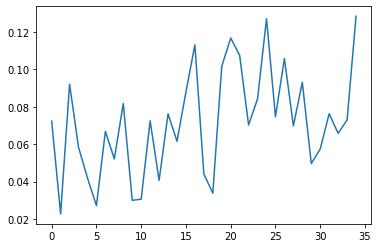

In [ ]:
plt.plot(individual_returns)
plt.show()

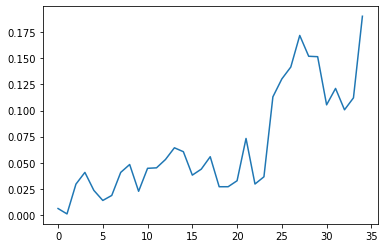

In [ ]:
from matplotlib import pyplot as plt
plt.plot(cumulative_returns)
plt.show()

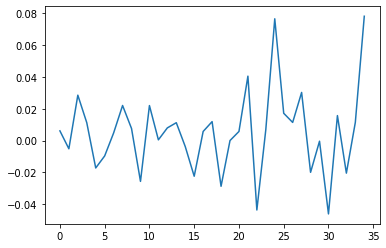

In [ ]:
plt.plot(individual_returns)
plt.show()

In [ ]:
final_df.tail()

,date,TICKER,CUSIP,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,wallstreet.eps,diff.eps,instrument_sector,estimize.eps.count,SHROUT,compounded_return,label1,label2,diff.eps.scaled
37351,2021-07-23,ACI,01309110,2021,1,2021-07-29,0.672845,0.689501,-0.016656,Consumer Staples,3.0,466511.0,0.071357,1,1,-0.024157
37353,2021-07-29,AERI,00771V10,2021,2,2021-08-04,-0.657930,-0.680102,0.022172,Health Care,4.0,47234.0,-0.056093,0,1,0.032601
37354,2021-08-03,FLGT,35966410,2021,2,2021-08-09,2.028226,2.756667,-0.728441,Health Care,5.0,29521.0,-0.034707,0,1,-0.264247
37355,2021-08-03,APPS,25400W10,2022,1,2021-08-09,0.327591,0.312500,0.015091,Information Technology,4.0,96093.0,-0.054422,0,1,0.048292
37356,2021-09-22,DAVA,29260V10,2021,4,2021-09-28,0.500000,0.492234,0.007766,Information Technology,3.0,6340.0,0.110137,1,1,0.015777


In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all_strat_returns = []
all_market_returns = []

for today in sorted(list(set(final_df['date'])))[150:]:
  ranks = []
  today_df = final_df[final_df['date'] == today]
  prev_df = final_df[final_df['date'] <= today]
  if len(today_df['TICKER'].value_counts()) < 10:
    continue
  Y = prev_df[['compounded_return']]
  X = prev_df[['diff.eps.scaled', 'SHROUT', 'estimize.eps.count']] #, 'instrument_sector_Consumer Discretionary',
        # 'instrument_sector_Consumer Staples', 'instrument_sector_Energy',
        # 'instrument_sector_Financials', 'instrument_sector_Health Care',
        # 'instrument_sector_Industrials',
        # 'instrument_sector_Information Technology',
        # 'instrument_sector_Materials',
        # 'instrument_sector_Telecommunication Services',
        # 'instrument_sector_Utilities']]

  # with sklearn
  regr = linear_model.LinearRegression()
  regr.fit(X, Y)

  # coefficients.append((regr.intercept_, regr.coef_))
  # print('Intercept: \n', regr.intercept_)
  # print('Coefficients: \n', regr.coef_)

  for ticker in set(today_df['TICKER']):
    pred_returns = regr.intercept_[0] + sum([regr.coef_[0][i] * list(today_df[today_df['TICKER']==ticker][col])[0] for i, col in enumerate(X.columns)])
    ranks.append((ticker, pred_returns),)
    # print(ticker,test_accuracy)
  
  ranks.sort(key=lambda x : x[1])
  ranks = list(reversed(ranks))
  # print(ranks)
  top_tickers = [sum(today_df[today_df['TICKER']==x[0]]['compounded_return']) for x in ranks[:5]]
  # tops = [x for x in top_tickers if x > 0]
  strat_returns = sum(top_tickers) / len(top_tickers)
  market_returns = list(today_df['market_compounded_return'])[0]
  all_strat_returns.append(strat_returns)
  all_market_returns.append(market_returns)


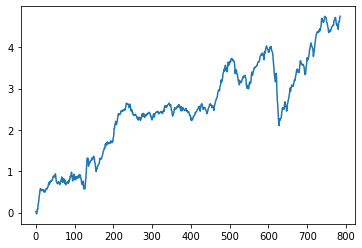

In [ ]:
plt.plot(np.cumsum(all_strat_returns))
plt.show()

In [ ]:
diff = []
for i in range(len(all_strat_returns)):
  diff.append(all_strat_returns[i] - all_market_returns[i])

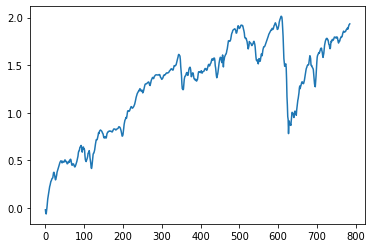

In [ ]:
plt.plot(np.cumsum(all_market_returns))
plt.show()

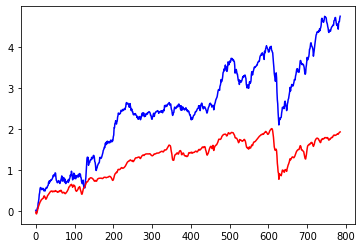

In [ ]:
plt.plot(np.cumsum(all_strat_returns),'b', np.cumsum(all_market_returns), 'r')

In [ ]:
cumulative_returns = []
individual_returns = []
cumulative_var = 0
for fiscal_year in sorted(list(set(final_df['fiscal_year']))):
  for fiscal_quarter in [1, 2, 3, 4]:
    print('----------------------------------', fiscal_year, " ", fiscal_quarter, '----------------------------------')
    ranks = []
    temp_df = final_df.dropna()
    temp_df = temp_df[temp_df['fiscal_year'] == fiscal_year][temp_df['fiscal_quarter'] == fiscal_quarter]
    if len(temp_df) < 10:
      print("Too few data for this quarter.")
      continue

    for ticker in set(temp_df['TICKER']):
      pred_diff = sum(list(temp_df[temp_df['TICKER']==ticker]['diff.eps.scaled']))
      ranks.append((ticker, pred_diff),)
      # print(ticker,test_accuracy)
    
    ranks.sort(key=lambda x : x[1])
    ranks = list(reversed(ranks))
    print(ranks[:10])
    top_tickers = [sum(temp_df[temp_df['TICKER']==x[0]]['compounded_return']) for x in ranks[:10]]
    tops = [x for x in top_tickers if x > 0.0]
    returns = sum(tops) / len(tops)
    individual_returns.append(returns)
    print(returns)
    cumulative_var += returns
    cumulative_returns.append(cumulative_var)
    



---------------------------------- 2013   1 ----------------------------------
Too few data for this quarter.
---------------------------------- 2013   2 ----------------------------------
Too few data for this quarter.
---------------------------------- 2013   3 ----------------------------------
Too few data for this quarter.
---------------------------------- 2013   4 ----------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[('SODA', 15.439304251106197), ('MGM', 3.62939875341888), ('FSLR', 0.5852414679039407), ('AMD', 0.5093568690368219), ('ADTN', 0.49226587525438964), ('REGN', 0.3784639419468882), ('DK', 0.34269092303682086), ('Z', 0.2872768590156196), ('LOCK', 0.26367113289891236), ('VMC', 0.25750937403674656)]
0.03860648984867824
---------------------------------- 2014   1 ----------------------------------
[('BTU', 6.036283602497799), ('AGU', 5.6981603632333115), ('SODA', 2.2603032071724063), ('TSLA', 1.715109505820297), ('MDVN', 1.3274724483577727), ('SINA', 1.2566263381912306), ('LOCK', 0.9394846341874241), ('DF', 0.890923134345829), ('Z', 0.8710961885927014), ('UA', 0.77068111578392)]
0.08615974446526331
---------------------------------- 2014   2 ----------------------------------
[('THC', 3.974510685070925), ('ATVI', 2.1560208281680686), ('DANG', 1.8571428571428572), ('DATA', 1.8301288642643307), ('GRPN', 1.6411282611832856), ('GPRO', 1.357589485376629), ('TSLA', 1.3451498264804755), ('SINA', 1.2

In [ ]:
from matplotlib import pyplot as plt
plt.plot(cumulative_returns)
plt.show()

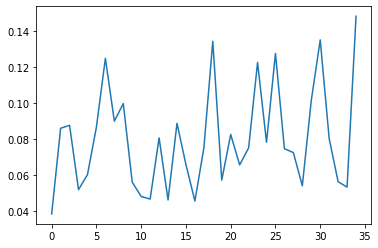

In [ ]:
plt.plot(individual_returns)
plt.show()

#Appendix: Miscellaneous

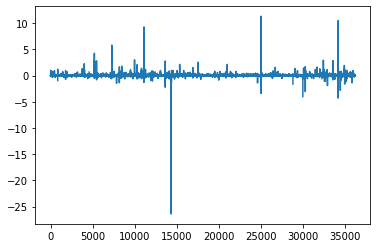

In [ ]:
merged_df['wallst_diff.eps'].plot()

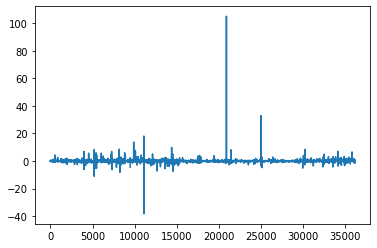

In [ ]:
merged_df['actual_diff.eps'].plot()

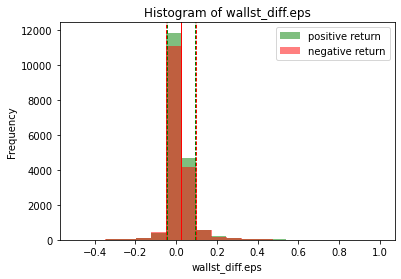

In [ ]:
data = merged_df[(merged_df['wallst_diff.eps'] > -0.5) & (merged_df['wallst_diff.eps'] < 1)]
# data = merged_df[(merged_df['wallst_diff.eps'] > -5)]
feature = 'wallst_diff.eps'

pos = data[data['label']==1][feature].values
neg = data[data['label']==0][feature].values

# plot title and axis
plt.title('Histogram of ' + feature)
plt.xlabel(feature)
plt.ylabel('Frequency')

# plot histograms
plt.hist(pos, bins=20, alpha=0.5, label='positive return', color='g')
plt.hist(neg, bins=20, alpha=0.5, label='negative return', color='r')

# plot means and stds
plt.axvline(pos.mean(), color='g', linewidth=1)
plt.axvline(neg.mean(), color='r', linewidth=1)
plt.axvline(pos.mean()-pos.std(), color='g', linewidth=1, linestyle='--')
plt.axvline(neg.mean()-neg.std(), color='r', linewidth=1, linestyle='--')
plt.axvline(pos.mean()+pos.std(), color='g', linewidth=1, linestyle='--')
plt.axvline(neg.mean()+neg.std(), color='r', linewidth=1, linestyle='--')

# display plot
plt.legend(loc='upper right')
plt.show()

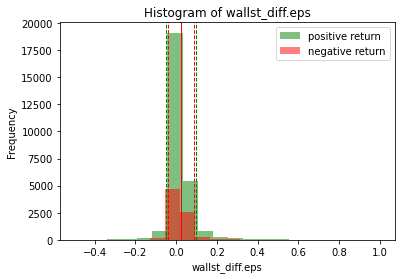

In [ ]:
data = merged_df[(merged_df['wallst_diff.eps'] > -0.5) & (merged_df['wallst_diff.eps'] < 1)]
# data = merged_df[(merged_df['wallst_diff.eps'] > -5)]
feature = 'wallst_diff.eps'

pos = data[data['label1']==1][feature].values
neg = data[data['label1']==0][feature].values

# plot title and axis
plt.title('Histogram of ' + feature)
plt.xlabel(feature)
plt.ylabel('Frequency')

# plot histograms
plt.hist(pos, bins=20, alpha=0.5, label='positive return', color='g')
plt.hist(neg, bins=20, alpha=0.5, label='negative return', color='r')

# plot means and stds
plt.axvline(pos.mean(), color='g', linewidth=1)
plt.axvline(neg.mean(), color='r', linewidth=1)
plt.axvline(pos.mean()-pos.std(), color='g', linewidth=1, linestyle='--')
plt.axvline(neg.mean()-neg.std(), color='r', linewidth=1, linestyle='--')
plt.axvline(pos.mean()+pos.std(), color='g', linewidth=1, linestyle='--')
plt.axvline(neg.mean()+neg.std(), color='r', linewidth=1, linestyle='--')

# display plot
plt.legend(loc='upper right')
plt.show()